# In this notebook I do the data analysis and the plots for the TOF TOMO paper

In [1]:
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
from skimage import io
import TOF_routines
from TOF_routines import l2tof, tof2l
from TOF_routines import find_nearest
from astropy.io import fits
from matplotlib_scalebar.scalebar import ScaleBar
from brokenaxes import brokenaxes
import matplotlib.gridspec as gridspec
import AdvancedBraggEdgeFitting_v2
from sklearn.metrics import mean_squared_error
import tifffile
from tifffile import TiffFile
import math

In [2]:
# This are the images without BB correction
nBins=165 
spectrum_img=np.zeros((476,476,nBins))
print(np.shape(spectrum_img))
for i in range (0, nBins):
    filename = 'D:\Kaestner\ISIS_IAEAData\RB1730044\PSI_Cylinder\Sample\RB1730044\Tomo_test\CT_recon_binSum_165bin_update\\bin'+str(i).zfill(4)+'\slice_0310.tif'
    spectrum_img[:,:,i]=io.imread(filename)
#     print(filename)

(476, 476, 165)


In [ ]:
# # I now load the images with BB correction
# nBins=165 
# spectrum_img_BB=np.zeros((476,476,nBins))
# print(np.shape(spectrum_img_BB))
# for i in range (0, nBins):
#     filename = 'D:\Kaestner\ISIS_IAEAData\RB1730044\PSI_Cylinder\Sample\RB1730044\Tomo_test\CT_recon_binSum_165bin_249_BBcorrected_const_dose\\bin'+str(i).zfill(4)+'\slice_0310.tif'
#     spectrum_img_BB[:,:,i]=io.imread(filename)
# #     print(filename)

In [ ]:
# # I now load the images with BB - sample correction 5%
# nBins=165 
# spectrum_img_BB=np.zeros((476,476,nBins))
# print(np.shape(spectrum_img_BB))
# for i in range (0, nBins):
#     filename = 'D:\Kaestner\ISIS_IAEAData\RB1730044\PSI_Cylinder\Sample\RB1730044\Tomo_test\CT_recon_binSum_165bin_249_BBcorrected_const_dose_SampleScattering\\bin'+str(i).zfill(4)+'\slice_0310.tif'
#     spectrum_img_BB[:,:,i]=io.imread(filename)
# #     print(filename)

In [ ]:
# # I now load the images with BB - sample correction 7%
# nBins=165 
# spectrum_img_BB=np.zeros((476,476,nBins))
# print(np.shape(spectrum_img_BB))
# for i in range (0, nBins):
#     filename = 'D:\Kaestner\ISIS_IAEAData\RB1730044\PSI_Cylinder\Sample\RB1730044\Tomo_test\CT_recon_binSum_165bin_249_BBcorrected_const_dose_SampleScat_7percent\\bin'+str(i).zfill(4)+'\slice_0310.tif'
#     spectrum_img_BB[:,:,i]=io.imread(filename)
# #     print(filename)

In [ ]:
# # I now load the images with BB - sample correction 7%
# nBins=165 
# spectrum_img_BB=np.zeros((476,476,nBins))
# print(np.shape(spectrum_img_BB))
# for i in range (0, nBins):
#     filename = 'D:\Kaestner\ISIS_IAEAData\RB1730044\PSI_Cylinder\Sample\RB1730044\Tomo_test\CT_recon_binSum_165bin_249_BBcorrected_const_dose_SampleScat_13percent\\bin'+str(i).zfill(4)+'\slice_0310.tif'
#     spectrum_img_BB[:,:,i]=io.imread(filename)
# #     print(filename)

In [62]:
# # I now load the images with BB - sample correction 7% const
# nBins=165 
# spectrum_img_BB=np.zeros((476,476,nBins))
# print(np.shape(spectrum_img_BB))
# for i in range (0, nBins):
#     filename = 'D:\Kaestner\ISIS_IAEAData\RB1730044\PSI_Cylinder\Sample\RB1730044\Tomo_test\CT_recon_binSum_165bin_249_BBcorrected_const_dose_SampleScat_7percent_const\\bin'+str(i).zfill(4)+'\slice_0310.tif'
#     spectrum_img_BB[:,:,i]=io.imread(filename)
# #     print(filename)

(476, 476, 165)


In [94]:
# I now load the images with BB - sample correction 5% const, This is now for the picture in the supplementary material 
nBins=165 
spectrum_img_BB_5pc=np.zeros((476,476,nBins))
print(np.shape(spectrum_img_BB))
for i in range (0, nBins):
    filename = 'D:\Kaestner\ISIS_IAEAData\RB1730044\PSI_Cylinder\Sample\RB1730044\Tomo_test\CT_recon_binSum_165bin_249_BBcorrected_const_dose_SampleScat_5percent_const\\bin'+str(i).zfill(4)+'\slice_0310.tif'
    spectrum_img_BB_5pc[:,:,i]=io.imread(filename)
#     print(filename)

(476, 476, 165)


In [95]:
# I now load the images with BB - sample correction 10% const
nBins=165 
spectrum_img_BB=np.zeros((476,476,nBins))
print(np.shape(spectrum_img_BB))
for i in range (0, nBins):
    filename = 'D:\Kaestner\ISIS_IAEAData\RB1730044\PSI_Cylinder\Sample\RB1730044\Tomo_test\CT_recon_binSum_165bin_249_BBcorrected_const_dose_SampleScat_10percent_const\\bin'+str(i).zfill(4)+'\slice_0310.tif'
    spectrum_img_BB[:,:,i]=io.imread(filename)
#     print(filename)

(476, 476, 165)


In [5]:
nBins=165 
spectrum_IMAT=np.zeros((512,512,nBins))
print(np.shape(spectrum_IMAT))
for i in range (0, nBins):
#     filename = 'D:\Kaestner\ISIS_IAEAData\RB1730044\PSI_Cylinder\Sample\RB1730044\Tomo_test\CT_recon_binSum_165bin_249_BBcorrected_const\\bin'+str(i).zfill(4)+'\slice_0405.tif'
    filename = 'D:/Kaestner/ISIS_IAEAData/RB1730015/Tomo_test_RB1730044/OpenBeam_aft3_Corrected_Binned/IMAT_tomo_binned_'+str(i).zfill(5)+'.fits'
    with fits.open(filename) as f:
        spectrum_IMAT[:,:,i]=f[0].data

(512, 512, 165)


In [96]:
Ti = np.zeros(nBins)
Fe = np.zeros(nBins)
Pb = np.zeros(nBins)
Ni = np.zeros(nBins)
Cu = np.zeros(nBins)
Al = np.zeros(nBins)
Ti_BB = np.zeros(nBins)
Fe_BB = np.zeros(nBins)
Pb_BB = np.zeros(nBins)
Ni_BB = np.zeros(nBins)
Cu_BB = np.zeros(nBins)
Al_BB = np.zeros(nBins)
Ti_BB_5pc = np.zeros(nBins)
Fe_BB_5pc = np.zeros(nBins)
Pb_BB_5pc = np.zeros(nBins)
Ni_BB_5pc = np.zeros(nBins)
Cu_BB_5pc = np.zeros(nBins)
Al_BB_5pc = np.zeros(nBins)

for i in range(0,nBins):
    Ti[i] = np.median(spectrum_img[150:200,80:130,i])
    Pb[i] = np.median(spectrum_img[50:100,200:250,i])
    Fe[i] = np.median(spectrum_img[300:350, 80:130,i])
    Cu[i] = np.median(spectrum_img[130:180,350:400,i])
    Ni[i] = np.median(spectrum_img[380:430,230:280,i])
    Al[i] = np.median(spectrum_img[280:330,330:380,i])
    Ti_BB[i] = np.median(spectrum_img_BB[150:200,80:130,i])
    Pb_BB[i] = np.median(spectrum_img_BB[50:100,200:250,i])
    Fe_BB[i] = np.median(spectrum_img_BB[300:350, 80:130,i])
    Cu_BB[i] = np.median(spectrum_img_BB[130:180,350:400,i])
    Ni_BB[i] = np.median(spectrum_img_BB[380:430,230:280,i])
    Al_BB[i] = np.median(spectrum_img_BB[280:330,330:380,i])
    Ti_BB_5pc[i] = np.median(spectrum_img_BB_5pc[150:200,80:130,i])
    Pb_BB_5pc[i] = np.median(spectrum_img_BB_5pc[50:100,200:250,i])
    Fe_BB_5pc[i] = np.median(spectrum_img_BB_5pc[300:350, 80:130,i])
    Cu_BB_5pc[i] = np.median(spectrum_img_BB_5pc[130:180,350:400,i])
    Ni_BB_5pc[i] = np.median(spectrum_img_BB_5pc[380:430,230:280,i])
    Al_BB_5pc[i] = np.median(spectrum_img_BB_5pc[280:330,330:380,i])
    
    

----- used ROIs -----


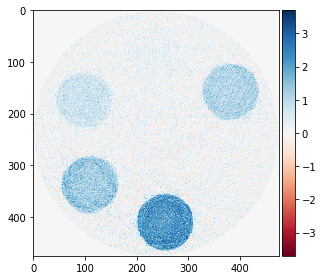

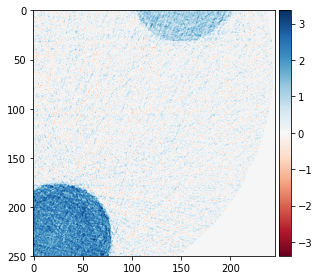

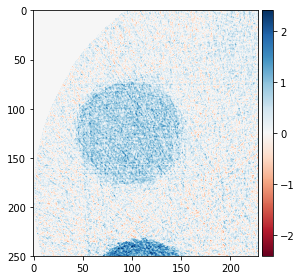

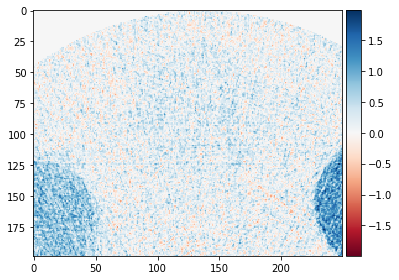

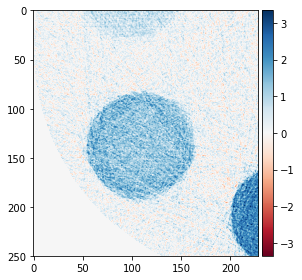

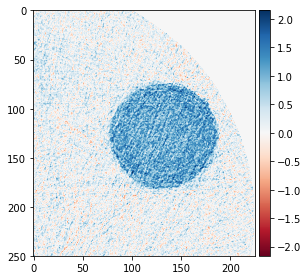

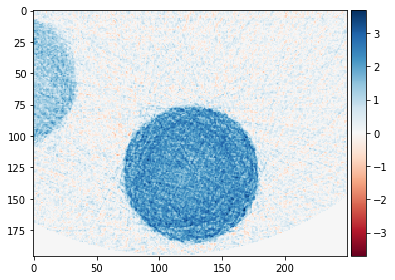

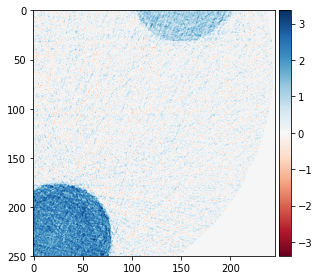

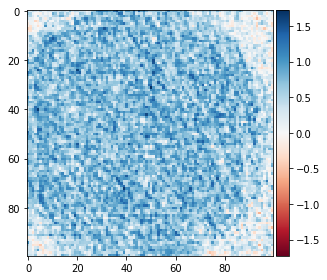

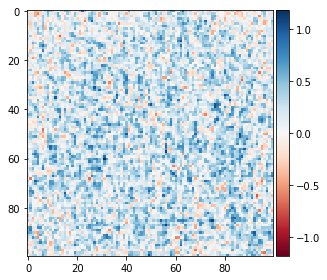

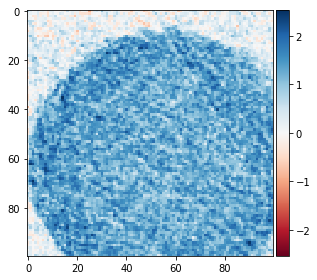

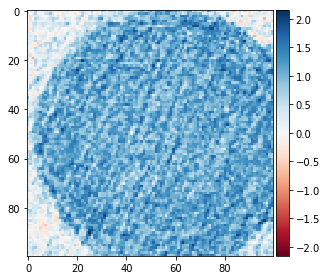

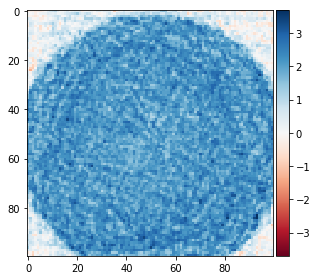

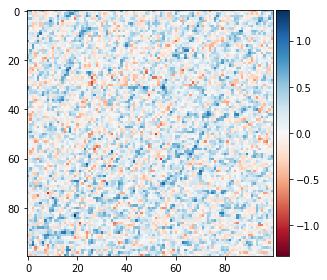

In [7]:
plt.figure()
io.imshow(spectrum_img[:,:,100])

plt.figure()
io.imshow(spectrum_img[280-100:330+100,330-100:380+100,100])

plt.figure()
io.imshow(spectrum_img[150-100:200+100,80-79:130+100,100])

plt.figure()
io.imshow(spectrum_img[50-49:100+100,200-100:250+100,100])

plt.figure()
io.imshow(spectrum_img[300-100:350+100, 80-79:130+100,100])

plt.figure()
io.imshow(spectrum_img[130-100:180+100,350-100:400+100,100])

plt.figure()
io.imshow(spectrum_img[380-100:430+100,230-100:280+100,100])

plt.figure()
io.imshow(spectrum_img[280-100:330+100,330-100:380+100,100])




print('----- used ROIs -----')

plt.figure()
io.imshow(spectrum_img[150-25:200+25,80-25:130+25,100])

plt.figure()
io.imshow(spectrum_img[50-25:100+25,200-25:250+25,100])

plt.figure()
io.imshow(spectrum_img[300-25:350+25, 80-25:130+25,100])

plt.figure()
io.imshow(spectrum_img[130-25:180+25,350-25:400+25,100])

plt.figure()
io.imshow(spectrum_img[380-25:430+25,230-25:280+25,100])

plt.figure()
io.imshow(spectrum_img[280-25:330+25,330-25:380+25,100])

In [14]:
myTOF = np.genfromtxt('D:\Kaestner\ISIS_IAEAData\RB1730044\PSI_Cylinder\Sample\RB1730044\Tomo_test\Sample\\angle0\IMAT00004675_Tomo_test_000_Spectra.txt', usecols=0)
t0 =  0.0
L = 56
h=6.62607004e-34 #Planck constant [m^2 kg / s]
m=1.674927471e-27 #Neutron mass [kg]
lambda0=0
myLambda =tof2l(myTOF, lambda0,t0,L)
lambda_bin = myLambda[1::18]

In [15]:
filename ="Cu.txt"
data_Cu = np.genfromtxt(filename)
print(np.shape(data_Cu))

data_Fe = np.genfromtxt('Fe.txt')
data_Pb=np.genfromtxt('Pb.txt')
data_Ti=np.genfromtxt('Ti.txt')
data_Ni=np.genfromtxt('Ni.txt')
data_Al = np.genfromtxt('Al.txt')

(300, 2)


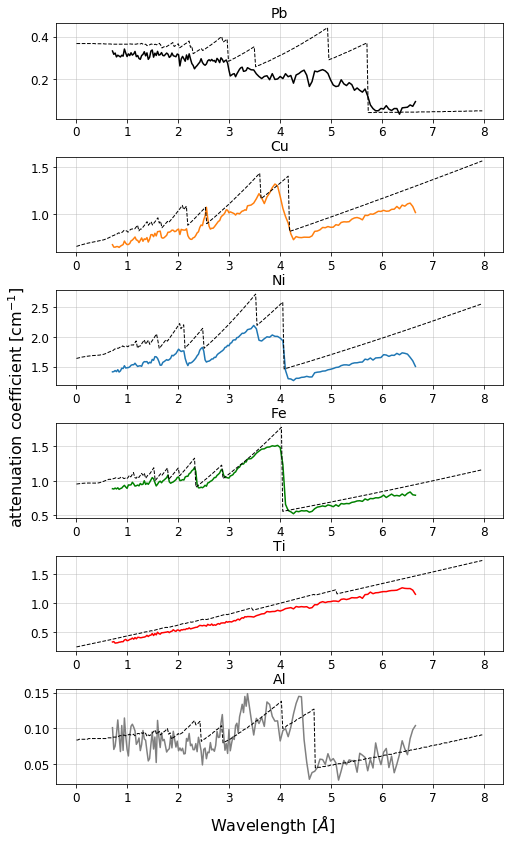

In [16]:
fig, ax = plt.subplots(nrows=3, ncols=3, sharex=True, sharey=True, figsize=(8, 14))

plt.subplot(611)
plt.plot(lambda_bin, Pb, 'k')
plt.plot(data_Pb[:,0],data_Pb[:,1],'--k',linewidth=1)
plt.title('Pb', fontsize=14)
plt.grid(alpha=0.5)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)

plt.subplot(612)
plt.plot(lambda_bin, Cu, 'C1')
plt.plot(data_Cu[:,0],data_Cu[:,1],'--k',linewidth=1)
plt.title('Cu', fontsize=14)
plt.grid(alpha=0.5)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)

plt.subplot(613)
plt.plot(lambda_bin, Ni)
plt.plot(data_Ni[:,0],data_Ni[:,1],'--k',linewidth=1)
plt.title('Ni', fontsize=14) 
plt.grid(alpha=0.5)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)


plt.subplot(614)
plt.plot(lambda_bin, Fe,'g')
plt.plot(data_Fe[:,0],data_Fe[:,1],'--k',linewidth=1)
plt.title('Fe', fontsize=14)
plt.grid(alpha=0.5)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)

plt.subplot(615)
plt.plot(lambda_bin, Ti,'r')
plt.plot(data_Ti[:,0],data_Ti[:,1],'--k',linewidth=1)
plt.title('Ti', fontsize=14)
plt.grid(alpha=0.5)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)

plt.subplot(616)
plt.plot(lambda_bin, Al, 'gray')
plt.plot(data_Al[:,0],data_Al[:,1],'--k',linewidth=1)
plt.title('Al', fontsize=14)
plt.grid(alpha=0.5)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)

plt.subplots_adjust(hspace=0.4)
fig.text(0.5, 0.08, 'Wavelength [$\AA$]', ha='center',fontsize=16)
fig.text(0.04, 0.5, 'attenuation coefficient [cm$^{-1}$]', va='center', rotation='vertical', fontsize=16)

# plt.savefig('spectra_plots.tiff')
plt.savefig('spectra_plots_NOBB.png', dpi=500)
# plt.savefig('spectra_plots.pdf')

[1.60052305 1.59306002 1.62957722 1.59781021 1.62695134 1.60426587
 1.60902065 1.6589331  1.66566354 1.71592826 1.67932618 1.68314362
 1.68253911 1.69948643 1.73379475 1.72944611 1.73088789 1.78771293
 1.73628205 1.70725793 1.7180137  1.7162053  1.70639575 1.76753205
 1.80186337 1.79618776 1.80332106 1.76698768 1.79125917 1.77724284
 1.84793174 1.833269   1.8897109  1.88415521 1.85187179 1.79240847
 1.72366369 1.72644877 1.77100903 1.80298036 1.8268109  1.81070864
 1.83824509 1.85515952 1.92066664 1.91675055 1.9402712  1.96361804
 2.00240731 2.05819345 2.03843129 2.00088775 2.01169336 2.02347636
 1.86179698 1.76076466 1.71726239 1.76995057 1.75802261 1.78101635
 1.806023   1.83948791 1.87098181 1.91482729 1.95737094 2.01815915
 2.05420768 2.09374464 2.01414311 1.82653016 1.77890402 1.79048753
 1.80264777 1.80808473 1.84783715 1.84682345 1.87933218 1.88994318
 1.93124819 1.95574206 1.97030133 1.99324667 2.0079788  2.03717828
 2.08274615 2.09218788 2.13356686 2.12206483 2.1725204  2.1801

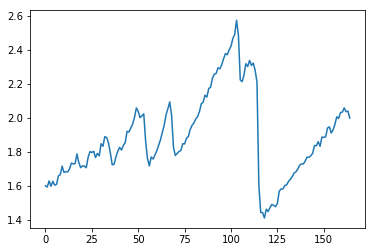

In [84]:
# This is to check the presence of nan in the files
plt.figure()
plt.plot(Ni_BB)
for i in range(0,155):
    if (math.isnan(Ni_BB[i])):
        print(i)

print(Ni_BB) 

In [18]:
spectrum = np.zeros(nBins)
for i in range(0,nBins):
    spectrum[i] = np.median(spectrum_IMAT[:,:,i])

(165,)


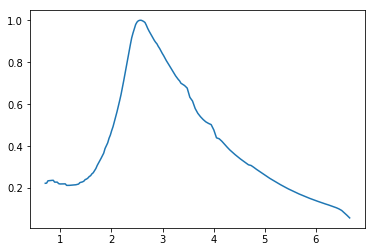

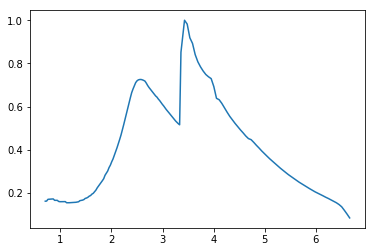

In [19]:
# Here I compensate for the different 

# plt.figure()
# plt.plot(lambda_bin,'.')
# plt.figure()
# plt.plot(lambda_bin, spectrum)

spectrum_proc = np.zeros(nBins)

for i in range(0,nBins):
    
    if i<101:
        spectrum_proc[i] = spectrum[i]
    else:
        spectrum_proc[i] = spectrum[i]/2.0


print(np.shape(spectrum_proc))

spectrum_proc[101] = (spectrum_proc[100]+spectrum_proc[102])/2

plt.figure()
plt.plot(lambda_bin, spectrum_proc/np.max(spectrum_proc))

plt.figure()
plt.plot(lambda_bin, spectrum/np.max(spectrum))

26 251
59.195116405288694
Ti:  0.7949814877299375
Ni:  2.0409283754694316
Fe:  1.0913524126970093
Cu:  1.0438253813650962
Pb:  0.33589624663664336
Al:  0.09362607613759212
Ti_7pc:  0.7361058936346351
Ni_7pc:  1.955472949985109
Fe_7pc:  1.1309492853738292
Cu_7pc:  1.002730691811709
Pb_7pc:  0.27004647145154775
Al_7pc:  0.07580798639858312
[ 0  2  4  6  8 10 12 14 16]


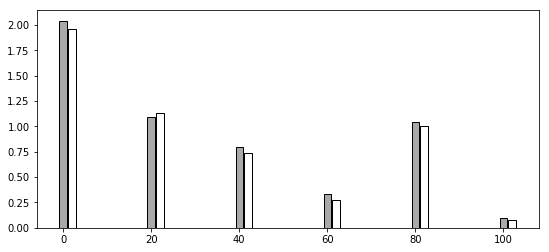

In [69]:
# Expected Attenuation coefficients for the white beam tomo
spectrum_norm = spectrum_proc/np.max(spectrum_proc)
data_Ti[:,1]
pos1 = find_nearest(data_Ti[:,0], 0.7)
pos2 = find_nearest(data_Ti[:,0], 6.7)
print(pos1,pos2)

att_Ti = 0
att_Ni = 0
att_Fe = 0
att_Pb = 0
att_Cu = 0
att_Al = 0

att_Ti_7pc = 0
att_Ni_7pc = 0
att_Fe_7pc = 0
att_Pb_7pc = 0
att_Cu_7pc = 0
att_Al_7pc = 0

for i in range(0, nBins):
    pos = find_nearest(data_Ti[:,0], lambda_bin[i])
    att_Ti += data_Ti[pos,1]*spectrum_norm[i]
    att_Ni += data_Ni[pos,1]*spectrum_norm[i]
    att_Fe += data_Fe[pos,1]*spectrum_norm[i]
    att_Pb += data_Pb[pos,1]*spectrum_norm[i]
    att_Cu += data_Cu[pos,1]*spectrum_norm[i]
    att_Al += data_Al[pos,1]*spectrum_norm[i]
    
    att_Ti_7pc += Ti_BB[i]*spectrum_norm[i]
    att_Ni_7pc += Ni_BB[i]*spectrum_norm[i]
    att_Fe_7pc += Fe_BB[i]*spectrum_norm[i]
    att_Pb_7pc += Pb_BB[i]*spectrum_norm[i]
    att_Cu_7pc += Cu_BB[i]*spectrum_norm[i]
    att_Al_7pc += Al_BB[i]*spectrum_norm[i]

print(att_Ti)
print('Ti: ', att_Ti/np.sum(spectrum_norm))
print('Ni: ', att_Ni/np.sum(spectrum_norm))
print('Fe: ', att_Fe/np.sum(spectrum_norm))
print('Cu: ', att_Cu/np.sum(spectrum_norm))
print('Pb: ', att_Pb/np.sum(spectrum_norm))
print('Al: ', att_Al/np.sum(spectrum_norm))

print('Ti_7pc: ', att_Ti_7pc/np.sum(spectrum_norm))
print('Ni_7pc: ', att_Ni_7pc/np.sum(spectrum_norm))
print('Fe_7pc: ', att_Fe_7pc/np.sum(spectrum_norm))
print('Cu_7pc: ', att_Cu_7pc/np.sum(spectrum_norm))
print('Pb_7pc: ', att_Pb_7pc/np.sum(spectrum_norm))
print('Al_7pc: ', att_Al_7pc/np.sum(spectrum_norm))


## Results are basically the same when using the non processed spectrum
# for i in range(0, nBins):
#     pos = find_nearest(data_Ti[:,0], lambda_bin[i])
#     att_Ti += data_Ti[pos,1]*spectrum[i]
#     att_Ni += data_Ni[pos,1]*spectrum[i]
#     att_Fe += data_Fe[pos,1]*spectrum[i]
#     att_Pb += data_Pb[pos,1]*spectrum[i]
#     att_Cu += data_Cu[pos,1]*spectrum[i]
#     att_Al += data_Al[pos,1]*spectrum[i]

# print(att_Ti)
# print('Ti: ', att_Ti/np.sum(spectrum))
# print('Ni: ', att_Ni/np.sum(spectrum))
# print('Fe: ', att_Fe/np.sum(spectrum))
# print('Cu: ', att_Cu/np.sum(spectrum))
# print('Pb: ', att_Pb/np.sum(spectrum))
# print('Al: ', att_Al/np.sum(spectrum))


# print(np.sum(data_Ti[pos1:pos2,1])/(pos2-pos1))
# print(np.sum(Ti)/len(Ti))
# print(np.sum(Ti_BB)/len(Ti_BB))

# print(np.sum(data_Ti[pos1:pos2,1]*spectrum_norm)/(pos2-pos1))
ax = plt.figure(figsize=[9,4])
x_Ni = np.arange(0,18,2)
print(x_Ni)
x_Fe = np.arange(20,38,2)
x_Ti = np.arange(40,58,2)
x_Pb = np.arange(60,78,2)
x_Cu = np.arange(80,98,2)
x_Al = np.arange(100,118,2)

Ni_AC = np.zeros(9)
Fe_AC = np.zeros(9)
Ti_AC = np.zeros(9)
Pb_AC = np.zeros(9)
Cu_AC = np.zeros(9)
Al_AC = np.zeros(9)
Ni_std = np.zeros(9)
Fe_std = np.zeros(9)
Ti_std = np.zeros(9)
Pb_std = np.zeros(9)
Cu_std = np.zeros(9)
Al_std = np.zeros(9)

Ni_AC[0] = att_Ni/np.sum(spectrum_norm)
Ni_AC[1] = att_Ni_7pc/np.sum(spectrum_norm)
Fe_AC[0] = att_Fe/np.sum(spectrum_norm)
Fe_AC[1] = att_Fe_7pc/np.sum(spectrum_norm)
Ti_AC[0] = att_Ti/np.sum(spectrum_norm)
Ti_AC[1] = att_Ti_7pc/np.sum(spectrum_norm)
Pb_AC[0] = att_Pb/np.sum(spectrum_norm)
Pb_AC[1] = att_Pb_7pc/np.sum(spectrum_norm)
Cu_AC[0] = att_Cu/np.sum(spectrum_norm)
Cu_AC[1] = att_Cu_7pc/np.sum(spectrum_norm)
Al_AC[0] = att_Al/np.sum(spectrum_norm)
Al_AC[1] = att_Al_7pc/np.sum(spectrum_norm)


#  , "+" , "x", "o", "O", ".", "*" 
patterns = [ "", "", "//" , "\\" , "-" ]
label = ['theoretical','no correction', '1%','5%','7%','8%','9%','10%', '20%']
colors =['darkgray','white','skyblue','mediumseagreen','orange', 'pink','cyan','yellow', 'lightgreen']
for i in range(0,2):
    plt.bar(x_Ni[i], Ni_AC[i],width=1.7, yerr = Ni_std[i], color=colors[i], edgecolor='k', label=label[i])
    plt.bar(x_Fe[i], Fe_AC[i], width=1.7,yerr= Fe_std[i], color=colors[i], edgecolor='k')
    plt.bar(x_Ti[i], Ti_AC[i], width=1.7,yerr= Ti_std[i],  color=colors[i], edgecolor='k')
    plt.bar(x_Pb[i], Pb_AC[i],width=1.7, yerr = Pb_std[i],  color=colors[i], edgecolor='k')
    plt.bar(x_Cu[i], Cu_AC[i], width=1.7,yerr = Cu_std[i],  color=colors[i], edgecolor='k')
    plt.bar(x_Al[i], Al_AC[i], width=1.7,yerr = Al_std[i],  color=colors[i], edgecolor='k')

In [21]:
print(np.sum(Ti_BB)/len(Ti_BB))
print(np.sum(Ti)/len(Ti))
print(np.sum(data_Ti[pos1:pos2,1])/(pos2-pos1))

0.8240036538152984
0.7207278008713867
0.9295688888888889


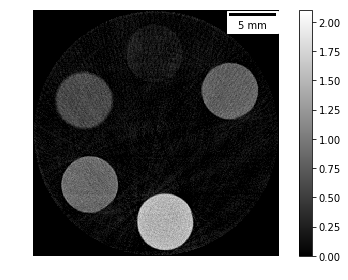

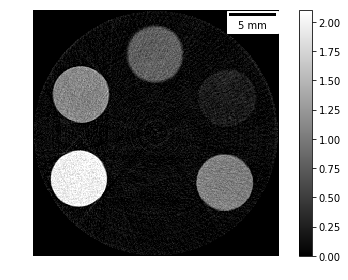

In [56]:
img_WB=io.imread('D:\Kaestner\ISIS_IAEAData\RB1730044\PSI_Cylinder\Sample\RB1730044\Tomo_test\CT_recon_WhiteBeam_dose\slice_0405.tif')
# img_WB_BB=io.imread('D:\Kaestner\ISIS_IAEAData\RB1730044\PSI_Cylinder\Sample\RB1730044\Tomo_test\CT_recon_WhiteBeam_BBcorrected_constValue_05pc\slice_0405.tif')
# img_WB_BB_10pc = io.imread('D:\Kaestner\ISIS_IAEAData\RB1730044\PSI_Cylinder\Sample\RB1730044\Tomo_test\CT_recon_WhiteBeam_BBcorrected_constValue_10pc\slice_0405.tif')
# img_WB_BB_20pc = io.imread('D:\Kaestner\ISIS_IAEAData\RB1730044\PSI_Cylinder\Sample\RB1730044\Tomo_test\CT_recon_WhiteBeam_BBcorrected_constValue_20pc\slice_0405.tif')
# img_WB_BB_01pc = io.imread('D:\Kaestner\ISIS_IAEAData\RB1730044\PSI_Cylinder\Sample\RB1730044\Tomo_test\CT_recon_WhiteBeam_BBcorrected_constValue_01pc\slice_0405.tif')



img_WB_BB_01pc = io.imread('D:\Kaestner\ISIS_IAEAData\RB1730044\PSI_Cylinder\Sample\RB1730044\Tomo_test\CT_recon_WhiteBeam_BBcorrected_constSample_01pc\slice_0405.tif')
img_WB_BB_05pc = io.imread('D:\Kaestner\ISIS_IAEAData\RB1730044\PSI_Cylinder\Sample\RB1730044\Tomo_test\CT_recon_WhiteBeam_BBcorrected_constSample_05pc\slice_0405.tif')
img_WB_BB_07pc = io.imread('D:\Kaestner\ISIS_IAEAData\RB1730044\PSI_Cylinder\Sample\RB1730044\Tomo_test\CT_recon_WhiteBeam_BBcorrected_constSample_07pc\slice_0405.tif')
img_WB_BB_08pc = io.imread('D:\Kaestner\ISIS_IAEAData\RB1730044\PSI_Cylinder\Sample\RB1730044\Tomo_test\CT_recon_WhiteBeam_BBcorrected_constSample_08pc\slice_0405.tif')
img_WB_BB_09pc = io.imread('D:\Kaestner\ISIS_IAEAData\RB1730044\PSI_Cylinder\Sample\RB1730044\Tomo_test\CT_recon_WhiteBeam_BBcorrected_constSample_09pc\slice_0405.tif')
img_WB_BB_10pc = io.imread('D:\Kaestner\ISIS_IAEAData\RB1730044\PSI_Cylinder\Sample\RB1730044\Tomo_test\CT_recon_WhiteBeam_BBcorrected_constSample_10pc\slice_0405.tif')
img_WB_BB_20pc = io.imread('D:\Kaestner\ISIS_IAEAData\RB1730044\PSI_Cylinder\Sample\RB1730044\Tomo_test\CT_recon_WhiteBeam_BBcorrected_constSample_20pc\slice_0405.tif')


## Whit those I only wanted to test if the number of angles had a big influence or not. And it does not.
# img_WB_BB_01pc = io.imread('D:\Kaestner\ISIS_IAEAData\RB1730044\PSI_Cylinder\Sample\RB1730044\Tomo_test\CT_recon_WhiteBeam_BBcorrected_constSample_01pc_360\slice_0405.tif')
# img_WB_BB_05pc = io.imread('D:\Kaestner\ISIS_IAEAData\RB1730044\PSI_Cylinder\Sample\RB1730044\Tomo_test\CT_recon_WhiteBeam_BBcorrected_constSample_05pc_360\slice_0405.tif')
# img_WB_BB_07pc = io.imread('D:\Kaestner\ISIS_IAEAData\RB1730044\PSI_Cylinder\Sample\RB1730044\Tomo_test\CT_recon_WhiteBeam_BBcorrected_constSample_07pc_360\slice_0405.tif')
# img_WB_BB_08pc = io.imread('D:\Kaestner\ISIS_IAEAData\RB1730044\PSI_Cylinder\Sample\RB1730044\Tomo_test\CT_recon_WhiteBeam_BBcorrected_constSample_08pc_360\slice_0405.tif')
# img_WB_BB_09pc = io.imread('D:\Kaestner\ISIS_IAEAData\RB1730044\PSI_Cylinder\Sample\RB1730044\Tomo_test\CT_recon_WhiteBeam_BBcorrected_constSample_09pc_360\slice_0405.tif')
# img_WB_BB_10pc = io.imread('D:\Kaestner\ISIS_IAEAData\RB1730044\PSI_Cylinder\Sample\RB1730044\Tomo_test\CT_recon_WhiteBeam_BBcorrected_constSample_10pc_360\slice_0405.tif')
# img_WB_BB_20pc = io.imread('D:\Kaestner\ISIS_IAEAData\RB1730044\PSI_Cylinder\Sample\RB1730044\Tomo_test\CT_recon_WhiteBeam_BBcorrected_constSample_20pc_360\slice_0405.tif')

img_WB_BB_rot = io.imread('D:\Kaestner\ISIS_IAEAData\RB1730044\PSI_Cylinder\Sample\RB1730044\Tomo_test\CT_recon_WhiteBeam_BBcorrected_constValue_05pc\\rotated\slice_0405.tif')
plt.figure()
cs=plt.imshow(img_WB, cmap='gray',vmin=0.0, vmax=2.1)
plt.axis('off')
plt.colorbar(cs)


scalebar = ScaleBar(0.000055) # 1 pixel = 0.2 meter
plt.gca().add_artist(scalebar)
plt.tight_layout()
plt.savefig('WhiteBeam.png', dpi=600) # This is also to be updated as i
# scalebar = AnchoredSizeBar(plt.get_axis, 0.055,'mm','upper right')

# plt.add_artist(scalebar)

plt.figure()
cs=plt.imshow(img_WB_BB_rot, cmap='gray',vmin=0.0, vmax=2.1)
plt.axis('off')
plt.colorbar(cs)
scalebar2 = ScaleBar(0.000055) 
plt.gca().add_artist(scalebar2)
plt.tight_layout()
plt.savefig('WhiteBeam_BB.png', dpi=600) # This is also to be updated as i
plt.savefig('WhiteBeam_BB.pdf')

In [71]:
# Here I add a bar plot with the attenuation coefficients for all background tested. 

## Here commented are the values obtained by subtracting the background only computed from the OB
# Ni_AC = np.array([2.04,  1.687, 1.731, 1.973, 2.43])
# Fe_AC = np.array([1.090, 0.968, 0.988, 1.093, 1.278])
# Ti_AC = np.array([0.796, 0.718, 0.726, 0.792, 0.898])
# Pb_AC = np.array([0.336, 0.223, 0.220, 0.235, 0.244])
# Cu_AC = np.array([1.044, 0.923, 0.938, 1.03, 1.197])
# Al_AC = np.array([0.094, 0.072, 0.07, 0.066, 0.004])

# Ni_std = np.array([0, 0.103, 0.103,0.120,0.162])
# Fe_std = np.array([0, 0.093, 0.096, 0.107, 0.130])
# Ti_std = np.array([0, 0.091, 0.095, 0.103, 0.122])
# Pb_std = np.array([0, 0.087, 0.09, 0.090, 0.110])
# Cu_std = np.array([0, 0.093, 0.093, 0.103, 0.125])
# Al_std = np.array([0, 0.087, 0.092, 0.097, 0.105])


## Here are the values obtained by subtracting a constant number computed from the sample image instead of the backgroudn
Ni_AC = np.zeros(9)
Fe_AC = np.zeros(9)
Ti_AC = np.zeros(9)
Pb_AC = np.zeros(9)
Cu_AC = np.zeros(9)
Al_AC = np.zeros(9)
Ni_std = np.zeros(9)
Fe_std = np.zeros(9)
Ti_std = np.zeros(9)
Pb_std = np.zeros(9)
Cu_std = np.zeros(9)
Al_std = np.zeros(9)

#theoretical values
Ni_AC[0]= 2.04
Fe_AC[0]= 1.090
Ti_AC[0]= 0.796
Pb_AC[0]= 0.336
Cu_AC[0]= 1.044
Al_AC[0]= 0.094

# #computed values
Ti_AC[1] = np.median(img_WB[150:200,80:130])
Pb_AC[1] = np.median(img_WB[50:100,200:250])
Fe_AC[1] = np.median(img_WB[300:350, 80:130])
Cu_AC[1] = np.median(img_WB[130:180,350:400])
Ni_AC[1] = np.median(img_WB[380:430,230:280])
Al_AC[1] = np.median(img_WB[280:330,330:380])
Ti_std[1] = np.std(img_WB[150:200,80:130])
Pb_std[1] = np.std(img_WB[50:100,200:250])
Fe_std[1] = np.std(img_WB[300:350,80:130])
Cu_std[1] = np.std(img_WB[130:180,350:400])
Ni_std[1] = np.std(img_WB[380:430,230:280])
Al_std[1] = np.std(img_WB[280:330,330:380])

# Ti_AC[2] = np.median(img_WB_BB_01pc[150:200,80:130])
# Pb_AC[2] = np.median(img_WB_BB_01pc[50:100,200:250])
# Fe_AC[2] = np.median(img_WB_BB_01pc[300:350, 80:130])
# Cu_AC[2] = np.median(img_WB_BB_01pc[130:180,350:400])
# Ni_AC[2] = np.median(img_WB_BB_01pc[380:430,230:280])
# Al_AC[2] = np.median(img_WB_BB_01pc[280:330,330:380])
# Ti_std[2] = np.std(img_WB_BB_01pc[150:200,80:130])
# Pb_std[2] = np.std(img_WB_BB_01pc[50:100,200:250])
# Fe_std[2] = np.std(img_WB_BB_01pc[300:350,80:130])
# Cu_std[2] = np.std(img_WB_BB_01pc[130:180,350:400])
# Ni_std[2] = np.std(img_WB_BB_01pc[380:430,230:280])
# Al_std[2] = np.std(img_WB_BB_01pc[280:330,330:380])

Ti_AC[2] = np.median(img_WB_BB_05pc[150:200,80:130])
Pb_AC[2] = np.median(img_WB_BB_05pc[50:100,200:250])
Fe_AC[2] = np.median(img_WB_BB_05pc[300:350, 80:130])
Cu_AC[2] = np.median(img_WB_BB_05pc[130:180,350:400])
Ni_AC[2] = np.median(img_WB_BB_05pc[380:430,230:280])
Al_AC[2] = np.median(img_WB_BB_05pc[280:330,330:380])
Ti_std[2] = np.std(img_WB_BB_05pc[150:200,80:130])
Pb_std[2] = np.std(img_WB_BB_05pc[50:100,200:250])
Fe_std[2] = np.std(img_WB_BB_05pc[300:350,80:130])
Cu_std[2] = np.std(img_WB_BB_05pc[130:180,350:400])
Ni_std[2] = np.std(img_WB_BB_05pc[380:430,230:280])
Al_std[2] = np.std(img_WB_BB_05pc[280:330,330:380])

Ti_AC[3] = np.median(img_WB_BB_07pc[150:200,80:130])
Pb_AC[3] = np.median(img_WB_BB_07pc[50:100,200:250])
Fe_AC[3] = np.median(img_WB_BB_07pc[300:350, 80:130])
Cu_AC[3] = np.median(img_WB_BB_07pc[130:180,350:400])
Ni_AC[3] = np.median(img_WB_BB_07pc[380:430,230:280])
Al_AC[3] = np.median(img_WB_BB_07pc[280:330,330:380])
Ti_std[3] = np.std(img_WB_BB_07pc[150:200,80:130])
Pb_std[3] = np.std(img_WB_BB_07pc[50:100,200:250])
Fe_std[3] = np.std(img_WB_BB_07pc[300:350,80:130])
Cu_std[3] = np.std(img_WB_BB_07pc[130:180,350:400])
Ni_std[3] = np.std(img_WB_BB_07pc[380:430,230:280])
Al_std[3] = np.std(img_WB_BB_07pc[280:330,330:380])

# Ti_AC[5] = np.median(img_WB_BB_08pc[150:200,80:130])
# Pb_AC[5] = np.median(img_WB_BB_08pc[50:100,200:250])
# Fe_AC[5] = np.median(img_WB_BB_08pc[300:350, 80:130])
# Cu_AC[5] = np.median(img_WB_BB_08pc[130:180,350:400])
# Ni_AC[5] = np.median(img_WB_BB_08pc[380:430,230:280])
# Al_AC[5] = np.median(img_WB_BB_08pc[280:330,330:380])
# Ti_std[5] = np.std(img_WB_BB_08pc[150:200,80:130])
# Pb_std[5] = np.std(img_WB_BB_08pc[50:100,200:250])
# Fe_std[5] = np.std(img_WB_BB_08pc[300:350,80:130])
# Cu_std[5] = np.std(img_WB_BB_08pc[130:180,350:400])
# Ni_std[5] = np.std(img_WB_BB_08pc[380:430,230:280])
# Al_std[5] = np.std(img_WB_BB_08pc[280:330,330:380])

# Ti_AC[6] = np.median(img_WB_BB_09pc[150:200,80:130])
# Pb_AC[6] = np.median(img_WB_BB_09pc[50:100,200:250])
# Fe_AC[6] = np.median(img_WB_BB_09pc[300:350, 80:130])
# Cu_AC[6] = np.median(img_WB_BB_09pc[130:180,350:400])
# Ni_AC[6] = np.median(img_WB_BB_09pc[380:430,230:280])
# Al_AC[6] = np.median(img_WB_BB_09pc[280:330,330:380])
# Ti_std[6] = np.std(img_WB_BB_09pc[150:200,80:130])
# Pb_std[6] = np.std(img_WB_BB_09pc[50:100,200:250])
# Fe_std[6] = np.std(img_WB_BB_09pc[300:350,80:130])
# Cu_std[6] = np.std(img_WB_BB_09pc[130:180,350:400])
# Ni_std[6] = np.std(img_WB_BB_09pc[380:430,230:280])
# Al_std[6] = np.std(img_WB_BB_09pc[280:330,330:380])

Ti_AC[4] = np.median(img_WB_BB_10pc[150:200,80:130])
Pb_AC[4] = np.median(img_WB_BB_10pc[50:100,200:250])
Fe_AC[4] = np.median(img_WB_BB_10pc[300:350, 80:130])
Cu_AC[4] = np.median(img_WB_BB_10pc[130:180,350:400])
Ni_AC[4] = np.median(img_WB_BB_10pc[380:430,230:280])
Al_AC[4] = np.median(img_WB_BB_10pc[280:330,330:380])
Ti_std[4] = np.std(img_WB_BB_10pc[150:200,80:130])
Pb_std[4] = np.std(img_WB_BB_10pc[50:100,200:250])
Fe_std[4] = np.std(img_WB_BB_10pc[300:350,80:130])
Cu_std[4] = np.std(img_WB_BB_10pc[130:180,350:400])
Ni_std[4] = np.std(img_WB_BB_10pc[380:430,230:280])
Al_std[4] = np.std(img_WB_BB_10pc[280:330,330:380])


# Ti_AC[8] = np.median(img_WB_BB_20pc[150:200,80:130])
# Pb_AC[8] = np.median(img_WB_BB_20pc[50:100,200:250])
# Cu_AC[8] = np.mean(img_WB_BB_20pc[130:180,350:400])
# Ni_AC[8] = np.mean(img_WB_BB_20pc[380:430,230:280])
# Al_AC[8] = np.mean(img_WB_BB_20pc[280:330,330:380])
# Ti_std[8] = np.std(img_WB_BB_20pc[150:200,80:130])
# Pb_std[8] = np.std(img_WB_BB_20pc[50:100,200:250])
# Fe_std[8] = np.std(img_WB_BB_20pc[300:350,80:130])
# Cu_std[8] = np.std(img_WB_BB_20pc[130:180,350:400])
# Ni_std[8] = np.std(img_WB_BB_20pc[380:430,230:280])
# Al_std[8] = np.std(img_WB_BB_20pc[280:330,330:380])


Ni_AC[5] = att_Ni_7pc/np.sum(spectrum_norm)
Fe_AC[5] = att_Fe_7pc/np.sum(spectrum_norm)
Ti_AC[5] = att_Ti_7pc/np.sum(spectrum_norm)
Pb_AC[5] = att_Pb_7pc/np.sum(spectrum_norm)
Cu_AC[5] = att_Cu_7pc/np.sum(spectrum_norm)
Al_AC[5] = att_Al_7pc/np.sum(spectrum_norm)

print('Ti_AC: ', Ti_AC)
print('Pb_AC: ', Pb_AC)
print('Fe_AC: ', Fe_AC)
print('Cu_AC: ', Cu_AC)
print('Ni_AC: ', Ni_AC)
print('Al_AC: ', Al_AC)

Ti_AC:  [0.796      0.61331844 0.75367355 0.77111208 0.79948372 0.73610589
 0.         0.         0.        ]
Pb_AC:  [0.336      0.18965614 0.23922369 0.2421509  0.24525791 0.27004647
 0.         0.         0.        ]
Fe_AC:  [1.09       0.85527003 1.03055763 1.05815458 1.10145116 1.13094929
 0.         0.         0.        ]
Cu_AC:  [1.044      0.77941054 0.97167146 0.99457848 1.03278279 1.00273069
 0.         0.         0.        ]
Ni_AC:  [2.04       1.45295382 1.81386185 1.87748098 1.98526192 1.95547295
 0.         0.         0.        ]
Al_AC:  [0.094      0.05027447 0.07046069 0.06684402 0.06215193 0.07580799
 0.         0.         0.        ]


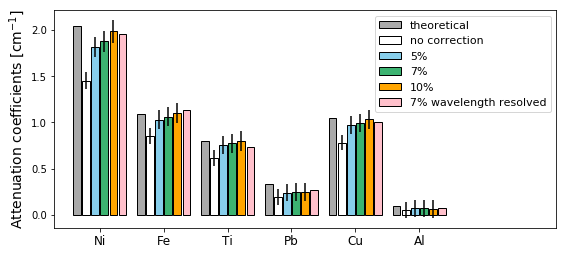

In [82]:
ax = plt.figure(figsize=[9,4])
# x_Ni = np.arange(0,18,2)
# print(x_Ni)
# x_Fe = np.arange(20,38,2)
# x_Ti = np.arange(40,58,2)
# x_Pb = np.arange(60,78,2)
# x_Cu = np.arange(80,98,2)
# x_Al = np.arange(100,118,2)

x_Ni = np.arange(0,12,2)
x_Fe = np.arange(14,26,2)
x_Ti = np.arange(28,40,2)
x_Pb = np.arange(42,54,2)
x_Cu = np.arange(56,68,2)
x_Al = np.arange(70,82,2)

#  , "+" , "x", "o", "O", ".", "*" 
patterns = [ "", "", "//" , "\\" , "-" ]
label = ['theoretical','no correction','5%','7%','10%', '7% wavelength resolved']
colors =['darkgray','white','skyblue','mediumseagreen','orange', 'pink','cyan','yellow', 'lightgreen']
for i in range(0,6):
    plt.bar(x_Ni[i], Ni_AC[i],width=1.7, yerr = Ni_std[i], color=colors[i], edgecolor='k', label=label[i])
    plt.bar(x_Fe[i], Fe_AC[i], width=1.7,yerr= Fe_std[i], color=colors[i], edgecolor='k')
    plt.bar(x_Ti[i], Ti_AC[i], width=1.7,yerr= Ti_std[i],  color=colors[i], edgecolor='k')
    plt.bar(x_Pb[i], Pb_AC[i],width=1.7, yerr = Pb_std[i],  color=colors[i], edgecolor='k')
    plt.bar(x_Cu[i], Cu_AC[i], width=1.7,yerr = Cu_std[i],  color=colors[i], edgecolor='k')
    plt.bar(x_Al[i], Al_AC[i], width=1.7,yerr = Al_std[i],  color=colors[i], edgecolor='k')

plt.legend(fontsize=11)
labels = ['Ni','Fe', 'Ti', 'Pb', 'Cu', 'Al']
# plt.xlim(-5,130)
plt.xlim(-5,105)
plt.xticks([5,19,33,47,61,75],labels, fontsize=12)
plt.ylabel('Attenuation coefficients [cm$^{-1}$]', fontsize=14)
plt.savefig("WhiteBeam_AC.pdf")


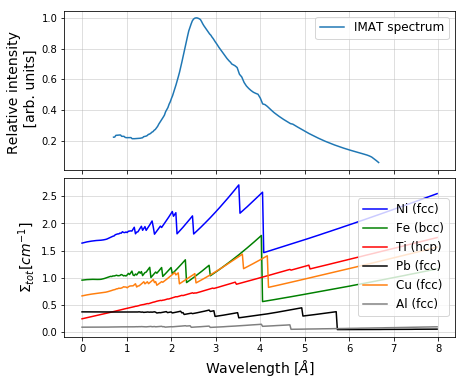

In [25]:
plt.subplots(figsize=(7,6))
ax1 = plt.subplot(211)
plt.plot(lambda_bin, spectrum_proc/np.max(spectrum_proc), label='IMAT spectrum')
plt.setp(ax1.get_xticklabels(), visible=False)
plt.ylabel('Relative intensity \n [arb. units]', fontsize=14)
plt.grid(alpha=0.5)
plt.legend(fontsize=12)

ax2 = plt.subplot(212, sharex=ax1)
plt.plot(data_Ni[:,0], data_Ni[:,1], c='b', label='Ni (fcc)')
plt.plot(data_Fe[:,0], data_Fe[:,1], c='g', label='Fe (bcc)')
plt.plot(data_Ti[:,0], data_Ti[:,1], c='r', label='Ti (hcp)')
plt.plot(data_Pb[:,0], data_Pb[:,1], c='k', label='Pb (fcc)')
plt.plot(data_Cu[:,0], data_Cu[:,1], c='C1',label='Cu (fcc)')
plt.plot(data_Al[:,0], data_Al[:,1], c='gray', label='Al (fcc)')
plt.grid(alpha=0.5)
plt.legend(loc='right', fontsize=12)

plt.xlabel('Wavelength [$\AA$]', fontsize=14)
plt.ylabel('$\Sigma_{tot}$[$cm^{-1}$]', fontsize=14)
plt.subplots_adjust(hspace=0.05)

plt.savefig('IMAT_spectrum_And_Thoretical.png', dpi=600)
plt.savefig('IMAT_spectrum_And_Thoretical.pdf')

In [26]:
# tosave = np.concatenate(lambda_bin, spectrum_proc,axis=1)
print(np.shape(lambda_bin), np.shape(spectrum_proc))
tosave =np.stack((lambda_bin[:], spectrum_proc[:]), axis=1)
print(np.shape(tosave))
np.savetxt('IMAT_spectrum.txt', tosave)


(165,) (165,)
(165, 2)


### Analysis voxel-based for the paper 

In [27]:
Ti_BB_image = spectrum_img_BB[150:200,80:130,:]
Pb_BB_image = spectrum_img_BB[50:100,200:250,:]
Fe_BB_image = spectrum_img_BB[300:350, 80:130,:]
Cu_BB_image = spectrum_img_BB[130:180,350:400,:]
Ni_BB_image = spectrum_img_BB[380:430,230:280,:]
Al_BB_image = spectrum_img_BB[280:330,330:380,:]

(50, 50, 165)
[0.71 1.23 1.77 2.29 2.81 3.33 4.37 5.41 6.45]


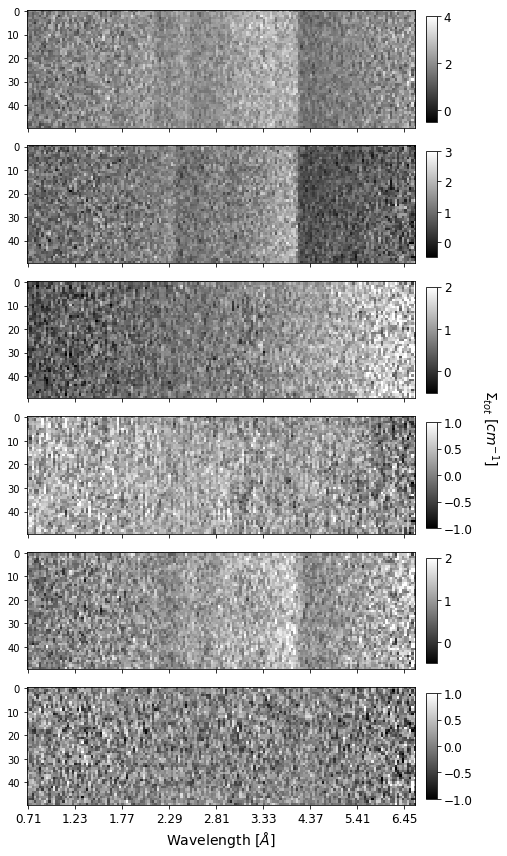

In [28]:
print(np.shape(Ti_BB_image))

fig, axes = plt.subplots(6,figsize=(8,12),sharex=True, sharey=True)

c1 = axes[0].imshow(Ni_BB_image[:,25,:], cmap='gray', vmin=-0.5, vmax=4.0)
cb = fig.colorbar(c1, ax=axes[0], shrink=0.9, pad=0.02, aspect=10)
cb.ax.tick_params(labelsize=12)

c2 = axes[1].imshow(Fe_BB_image[:,25,:], cmap='gray', vmin=-0.5, vmax=3.0)
cb=fig.colorbar(c2, ax=axes[1], shrink=0.9, pad=0.02, aspect=10)
cb.ax.tick_params(labelsize=12)

c3=axes[2].imshow(Ti_BB_image[:,25,:], cmap='gray', vmin=-0.5, vmax=2.0)
cb=fig.colorbar(c3, ax=axes[2], shrink=0.9, pad=0.02, aspect=10)
cb.ax.tick_params(labelsize=12)

c4=axes[3].imshow(Pb_BB_image[:,25,:], cmap='gray', vmin=-1.0, vmax=1.0)
cb=fig.colorbar(c4, ax=axes[3], shrink=0.9, pad=0.02, aspect=10)
cb.ax.tick_params(labelsize=12)

c5=axes[4].imshow(Cu_BB_image[:,25,:], cmap='gray', vmin=-0.5, vmax=2.0)
cb=fig.colorbar(c5, ax=axes[4], shrink=0.9, pad=0.02, aspect=10)
cb.ax.tick_params(labelsize=12)

c6=axes[5].imshow(Al_BB_image[:,25,:], cmap='gray', vmin=-1.0, vmax=1.0)
cb=fig.colorbar(c6, ax=axes[5], shrink=0.9, pad=0.02, aspect=10)
cb.ax.tick_params(labelsize=12)

mylabels=np.round(lambda_bin[0::20],2)
axes[5].set_xticklabels([0.71, 0.71, 1.23, 1.77, 2.29, 2.81, 3.33, 4.37, 5.41, 6.45], fontsize=12)
# plt.subplots_adjust(wspace=0.005) # non cambia un cazzo
axes[5].set_xlabel('Wavelength [$\AA$]', fontsize=14)
fig.text(0.93, 0.5, '$\Sigma_{tot}$ [$cm^{-1}$]', va='center', rotation=-90, fontsize=14)

fig.tight_layout()
print(np.round(lambda_bin[0::20],2))
# plt.savefig('energy_slice_viridis.pdf')
plt.savefig('energy_slice_gray.pdf')


In [29]:
Ni5x5 = np.zeros(nBins)
Fe5x5 = np.zeros(nBins)
Ti5x5 = np.zeros(nBins)
Pb5x5 = np.zeros(nBins)
Cu5x5 = np.zeros(nBins)
Al5x5 = np.zeros(nBins)

for i in range(0, nBins):

    Ni5x5[i] = np.median(Ni_BB_image[23:28,23:28,i])
    Fe5x5[i] = np.median(Fe_BB_image[23:28,23:28,i])
    Ti5x5[i] = np.median(Ti_BB_image[23:28,23:28,i])
    Pb5x5[i] = np.median(Pb_BB_image[23:28,23:28,i])
    Cu5x5[i] = np.median(Cu_BB_image[23:28,23:28,i])
    Al5x5[i] = np.median(Al_BB_image[23:28,23:28,i])

print(np.shape(Ni_BB_image[20:30,20:30,i]))


(10, 10)


In [30]:
resampled_Ni = np.interp(lambda_bin, data_Ni[:,0], data_Ni[:,1])
resampled_Fe = np.interp(lambda_bin, data_Fe[:,0], data_Fe[:,1])
resampled_Ti = np.interp(lambda_bin, data_Ti[:,0], data_Ti[:,1])
resampled_Pb = np.interp(lambda_bin, data_Pb[:,0], data_Pb[:,1])
resampled_Cu = np.interp(lambda_bin, data_Cu[:,0], data_Cu[:,1])
resampled_Al = np.interp(lambda_bin, data_Al[:,0], data_Al[:,1])

#RMSE OF THESE, it is probably not a good metric, as it depends on the scale of the data, and it is sensitive to outliers

rms_Ni = np.sqrt(mean_squared_error(resampled_Ni, Ni5x5))
rms_Fe = np.sqrt(mean_squared_error(resampled_Fe, Fe5x5))
rms_Ti = np.sqrt(mean_squared_error(resampled_Ti, Ti5x5))
rms_Pb = np.sqrt(mean_squared_error(resampled_Pb, Pb5x5))
rms_Cu = np.sqrt(mean_squared_error(resampled_Cu, Cu5x5))
rms_Al = np.sqrt(mean_squared_error(resampled_Al, Al5x5)) 
print(rms_Ni, rms_Fe, rms_Ti, rms_Pb, rms_Cu, rms_Al)


# normalized cross correlation
CC_Ni = np.correlate((resampled_Ni-np.mean(resampled_Ni))/(np.std(resampled_Ni)*len(resampled_Ni)), (Ni5x5-np.mean(Ni5x5))/np.std(Ni5x5))
CC_Fe = np.correlate((resampled_Fe-np.mean(resampled_Fe))/(np.std(resampled_Fe)*len(resampled_Fe)), (Fe5x5-np.mean(Fe5x5))/np.std(Fe5x5))
CC_Ti = np.correlate((resampled_Ti-np.mean(resampled_Ti))/(np.std(resampled_Ti)*len(resampled_Ti)), (Ti5x5-np.mean(Ti5x5))/np.std(Ti5x5))
CC_Pb = np.correlate((resampled_Pb-np.mean(resampled_Pb))/(np.std(resampled_Pb)*len(resampled_Pb)), (Pb5x5-np.mean(Pb5x5))/np.std(Pb5x5))
CC_Cu = np.correlate((resampled_Cu-np.mean(resampled_Cu))/(np.std(resampled_Cu)*len(resampled_Cu)), (Cu5x5-np.mean(Cu5x5))/np.std(Cu5x5))
CC_Al = np.correlate((resampled_Al-np.mean(resampled_Al))/(np.std(resampled_Al)*len(resampled_Al)), (Al5x5-np.mean(Al5x5))/np.std(Al5x5))

print(CC_Ni, CC_Fe,CC_Ti,CC_Pb, CC_Cu, CC_Al  )

0.14953003438938106 0.17685185122772856 0.10698028819224586 0.12876235437548686 0.12712445931230176 0.12123262297538583
[0.8758783] [0.85548978] [0.95759829] [0.55479957] [0.79457478] [0.08378196]


# Spectral analysis with different implementation of the error bar

In [31]:
def rebin(arr, new_shape):
    """Rebin 2D array arr to shape new_shape by averaging."""
    shape = (new_shape[0], arr.shape[0] // new_shape[0],
             new_shape[1], arr.shape[1] // new_shape[1])
    return arr.reshape(shape).mean(-1).mean(1)

In [32]:
#Here I compute the std when binning the image with 5x5, that should give a more meaningfull estimation of the error
# print(curr_x1, curr_x2, curr_y1, curr_y2)


Ti_macro=Ti_BB_image[0:50,0:50,:]
Fe_macro=Fe_BB_image[0:50,0:50,:]
Cu_macro=Cu_BB_image[0:50,0:50,:]
Pb_macro=Pb_BB_image[0:50,0:50,:]
Ni_macro=Ni_BB_image[0:50,0:50,:]
Al_macro=Al_BB_image[0:50,0:50,:]
print(np.shape(Ti_macro))

Ti_rebin = np.zeros([10,10,nBins])
Fe_rebin = np.zeros([10,10,nBins])
Cu_rebin = np.zeros([10,10,nBins])
Pb_rebin = np.zeros([10,10,nBins])
Ni_rebin = np.zeros([10,10,nBins])
Al_rebin = np.zeros([10,10,nBins])
Ti_std=np.zeros(nBins)
Fe_std=np.zeros(nBins)
Cu_std=np.zeros(nBins)
Pb_std=np.zeros(nBins)
Ni_std=np.zeros(nBins)
Al_std=np.zeros(nBins)

for i in range(0,nBins):
    Ti_rebin[:,:,i] = rebin(Ti_macro[:,:,i],[10,10])
    Fe_rebin[:,:,i] = rebin(Fe_macro[:,:,i],[10,10])
    Cu_rebin[:,:,i] = rebin(Cu_macro[:,:,i],[10,10])
    Pb_rebin[:,:,i] = rebin(Pb_macro[:,:,i],[10,10])
    Ni_rebin[:,:,i] = rebin(Ni_macro[:,:,i],[10,10])
    Al_rebin[:,:,i] = rebin(Al_macro[:,:,i],[10,10])
    
    Ti_std[i] = np.std(Ti_rebin[:,:,i])
    Fe_std[i] = np.std(Fe_rebin[:,:,i])
    Cu_std[i] = np.std(Cu_rebin[:,:,i])
    Pb_std[i] = np.std(Pb_rebin[:,:,i])
    Ni_std[i] = np.std(Ni_rebin[:,:,i])
    Al_std[i] = np.std(Al_rebin[:,:,i])


(50, 50, 165)


### paper figure 

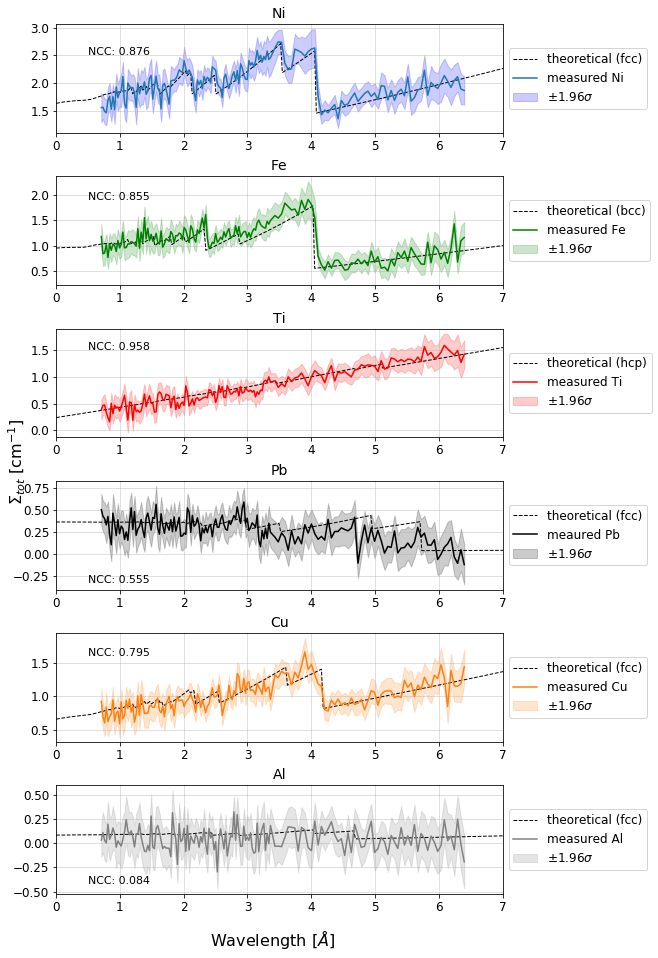

In [33]:
#Here I re-do the spectra plot with +- 1std of the binned image as error bar (should be more correct)
# THIS IS THE ONE USED FOR THE PAPER. THE OTHER PLOT WITH THE BIGGER ROI IS MADE AT THE END OF THE NOTEBOOK AS IT REQUIRES 4D ANALYSIS

fig, ax = plt.subplots(nrows=3, ncols=3, sharex=True, sharey=True, figsize=(8, 16))

ax1 = plt.subplot(611)
plt.plot(data_Ni[:,0],data_Ni[:,1],'--k',linewidth=1, label='theoretical (fcc)')
plt.plot(lambda_bin[:160], Ni5x5[:160], label='measured Ni')
plt.fill_between(lambda_bin[:160], Ni5x5[:160]-1.96*Ni_std[:160], Ni5x5[:160]+1.96*Ni_std[:160], color='b', alpha=0.2, label='$\pm1.96\sigma$')
plt.title('Ni', fontsize=14) 
plt.grid(alpha=0.5)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.xlim([0,7])
plt.text(0.5,2.5, 'NCC: '+ str(round(CC_Ni[0],3)), fontsize=11)
lg1 = ax1.legend(loc='center left', bbox_to_anchor=(1, 0.5), fontsize=12)



ax2 = plt.subplot(612)
plt.plot(data_Fe[:,0],data_Fe[:,1],'--k',linewidth=1, label='theoretical (bcc)')
plt.plot(lambda_bin[:160], Fe5x5[:160],'g', label='measured Fe')
plt.fill_between(lambda_bin[:160], Fe5x5[:160]-1.96*Fe_std[:160], Fe5x5[:160]+1.96*Fe_std[:160], color='g', alpha=0.2, label='$\pm1.96\sigma$')
plt.title('Fe', fontsize=14)
plt.grid(alpha=0.5)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.xlim([0,7])
plt.text(0.5,1.9, 'NCC: '+ str(round(CC_Fe[0],3)), fontsize=11)

lg2 = ax2.legend(loc='center left', bbox_to_anchor=(1, 0.5), fontsize=12)

ax3=plt.subplot(613)
plt.plot(data_Ti[:,0],data_Ti[:,1],'--k',linewidth=1,label='theoretical (hcp)' )
plt.plot(lambda_bin[:160], Ti5x5[:160],'r', label='measured Ti')
plt.fill_between(lambda_bin[:160], Ti5x5[:160]-1.96*Ti_std[:160], Ti5x5[:160]+1.96*Ti_std[:160], color='r', alpha=0.2,label='$\pm1.96\sigma$')
plt.grid(alpha=0.5)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.title('Ti', fontsize=14)
plt.xlim([0,7])
plt.text(0.5,1.5, 'NCC: '+ str(round(CC_Ti[0],3)), fontsize=11)

lg3 = ax3.legend(loc='center left', bbox_to_anchor=(1, 0.5), fontsize=12)

ax4=plt.subplot(614)
plt.plot(data_Pb[:,0],data_Pb[:,1],'--k',linewidth=1,label='theoretical (fcc)')
plt.plot(lambda_bin[:160], Pb5x5[:160], 'k', label='meaured Pb')
plt.fill_between(lambda_bin[:160], Pb5x5[:160]-1.96*Pb_std[:160], Pb5x5[:160]+1.96*Pb_std[:160], color='k', alpha=0.2, label='$\pm1.96\sigma$')
plt.title('Pb', fontsize=14)
plt.grid(alpha=0.5)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.xlim([0,7])
plt.text(0.5,-0.33, 'NCC: '+ str(round(CC_Pb[0],3)), fontsize=11)

lg4 = ax4.legend(loc='center left', bbox_to_anchor=(1, 0.5), fontsize=12)

ax5=plt.subplot(615)
plt.plot(data_Cu[:,0],data_Cu[:,1],'--k',linewidth=1, label='theoretical (fcc)')
plt.plot(lambda_bin[:160], Cu5x5[:160], 'C1', label='measured Cu')
plt.fill_between(lambda_bin[:160], Cu5x5[:160]-1.96*Cu_std[:160], Cu5x5[:160]+1.96*Cu_std[:160], color='C1', alpha=0.2, label='$\pm1.96\sigma$')
plt.title('Cu', fontsize=14)
plt.grid(alpha=0.5)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.xlim([0,7])
plt.text(0.5,1.6, 'NCC: '+ str(round(CC_Cu[0],3)), fontsize=11)
lg5 = ax5.legend(loc='center left', bbox_to_anchor=(1, 0.5), fontsize=12)

ax6=plt.subplot(616)
plt.plot(data_Al[:,0],data_Al[:,1],'--k',linewidth=1, label='theoretical (fcc)')
plt.plot(lambda_bin[:160], Al5x5[:160], 'gray', label='measured Al')
plt.fill_between(lambda_bin[:160], Al5x5[:160]-1.96*Al_std[:160], Al5x5[:160]+1.96*Al_std[:160], color='gray', alpha=0.2, label='$\pm1.96\sigma$')
plt.title('Al', fontsize=14)
plt.grid(alpha=0.5)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.xlim([0,7])
plt.text(0.5,-0.42, 'NCC: '+ str(round(CC_Al[0],3)), fontsize=11)
lg6 = ax6.legend(loc='center left', bbox_to_anchor=(1, 0.5), fontsize=12)

plt.subplots_adjust(hspace=0.4)
text = fig.text(0.5, 0.08, 'Wavelength [$\AA$]', ha='center',fontsize=16)
fig.text(0.04, 0.5, '$\Sigma_{tot}$ [cm$^{-1}$]', va='center', rotation='vertical', fontsize=16)
plt.savefig('spectra_plots_BB_dose_5x5_NCC_binnedsigma.pdf',bbox_extra_artists=(lg1,lg2,lg3,lg4,lg5,lg6, text), bbox_inches='tight')

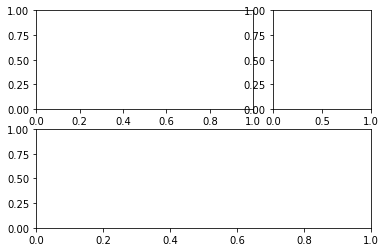

In [34]:
fig = plt.figure()

gs = fig.add_gridspec(2,3)
ax1 = fig.add_subplot(gs[0, 0:2])
ax2 = fig.add_subplot(gs[0, 2])
ax3 = fig.add_subplot(gs[1, :])

plt.show()

## Edge fitting on a 5x5 roi for Nickel and Iron 

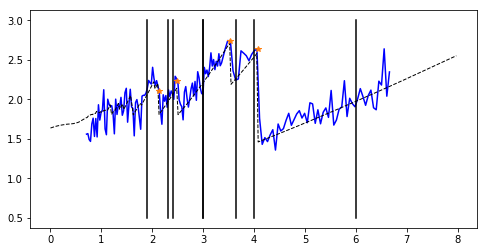

In [35]:
# Ni5x5 and Fe5x5

# # I start with Nichel
# # hkl     multiplicity     d_hkl     |F|^2
#  1  1  1         8       2.035    1610.470
#  2  0  0         6       1.762    1582.482
#  2  2  0        12       1.246    1475.309
#  3  1  1        24       1.063    1399.720
#  2  2  2         8       1.017    1375.395
#  4  0  0         6       0.881    1282.247
#  3  3  1        24       0.808    1216.550
#  4  2  0        24       0.788    1195.407
Ni_4D_av = Ni5x5

lambda_ranges_Ni=np.zeros((4,2))


lambda_ranges_Ni[3,0] = 3.65
lambda_ranges_Ni[3,1] = 6.0

lambda_ranges_Ni[2,0] = 3.0
lambda_ranges_Ni[2,1] = 4.0

lambda_ranges_Ni[1,0] = 2.3
lambda_ranges_Ni[1,1] = 3.0

lambda_ranges_Ni[0,0] = 1.9
lambda_ranges_Ni[0,1] = 2.4


peak_pos_Ni = np.zeros(4)
peak_pos_Ni[0] =  1.063*2
peak_pos_Ni[1] = 1.246*2
peak_pos_Ni[2] = 1.762*2
peak_pos_Ni[3] = 2.035*2

plt.figure(figsize=(8,4))
plt.plot(lambda_bin, Ni_4D_av,'b', linewidth=1.5, label='Ni')
plt.plot(data_Ni[:,0],data_Ni[:,1],'--k',linewidth=1)
for i in range(0,4):
    plt.plot((lambda_ranges_Ni[i,0], lambda_ranges_Ni[i,0]),(0.5,3.0), 'k-')
    plt.plot((lambda_ranges_Ni[i,1], lambda_ranges_Ni[i,1]),(0.5,3.0), 'k-')
    plt.plot(peak_pos_Ni[i],Ni_4D_av[TOF_routines.find_nearest(peak_pos_Ni[i], lambda_bin)],'C1*')

[1.9 2.4]
[45 64]
0
Parameters([('t0', <Parameter 't0', 2.1429252835394164, bounds=[1.9022660181814695:2.3970599076686825]>), ('alpha', <Parameter 'alpha', 0.0016263885838916992, bounds=[0.0:1.5]>), ('sigma', <Parameter 'sigma', 0.014381447003803423, bounds=[0.0:1.5]>), ('a1', <Parameter 'a1', -1.2958715901375502, bounds=[-inf:inf]>), ('a2', <Parameter 'a2', 1.441155997472754, bounds=[-inf:inf]>), ('a5', <Parameter 'a5', 2.034271383661187, bounds=[-inf:inf]>), ('a6', <Parameter 'a6', 0.09610705263100154, bounds=[-inf:inf]>), ('bool_transmission', <Parameter 'bool_transmission', value=-inf (fixed), bounds=[-inf:inf]>)])
[[Model]]
    Model(BraggEdgeLinear)
[[Fit Statistics]]
    # fitting method   = least_squares
    # function evals   = 16
    # data points      = 19
    # variables        = 7
    chi-square         = 0.13172405
    reduced chi-square = 0.01097700
    Akaike info crit   = -80.4582155
    Bayesian info crit = -73.8471426
##  Warning: uncertainties could not be estimated

C:\Users\carminati_c\git\scripts\python\ToF_notebooks\AdvancedBraggEdgeFitting_v2.py:61: RuntimeWarning: invalid value encountered in multiply
  edge = 0.5*(term3(t,t0,sigma) - term4(t,t0,alpha,sigma)* term5(t,t0,alpha,sigma))


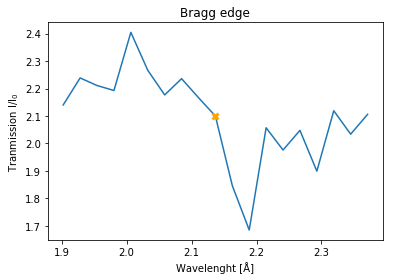

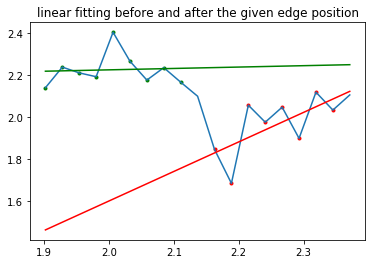

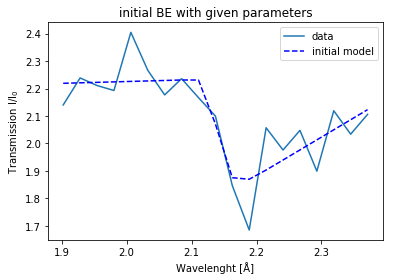

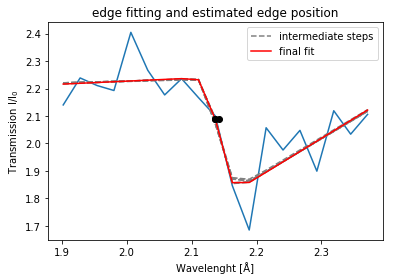

[[Model]]
    Model(BraggEdgeLinear)
[[Fit Statistics]]
    # fitting method   = least_squares
    # function evals   = 3
    # data points      = 19
    # variables        = 2
    chi-square         = 0.13455025
    reduced chi-square = 0.00791472
    Akaike info crit   = -90.0548738
    Bayesian info crit = -88.1659958
[[Variables]]
    t0:                 2.13664 (fixed)
    alpha:              0.01 (fixed)
    sigma:              0.01 (fixed)
    a1:                -1.22320504 +/- 0.02983546 (2.44%) (init = -1.21738)
    a2:                 1.408845 (fixed)
    a5:                 2.093066 (fixed)
    a6:                 0.06719134 +/- 0.01442348 (21.47%) (init = 0.06621686)
    bool_transmission: -inf (fixed)

[[Model]]
    Model(BraggEdgeLinear)
[[Fit Statistics]]
    # fitting method   = least_squares
    # function evals   = 2
    # data points      = 19
    # variables        = 2
    chi-square         = 0.13455009
    reduced chi-square = 0.00791471
    Akaike info crit   = -

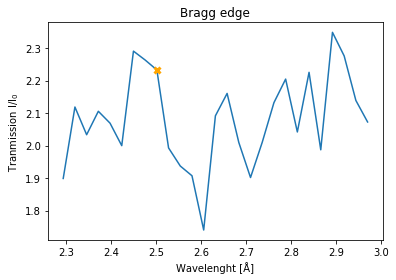

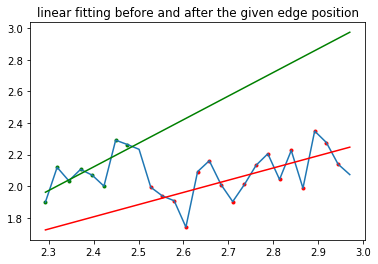

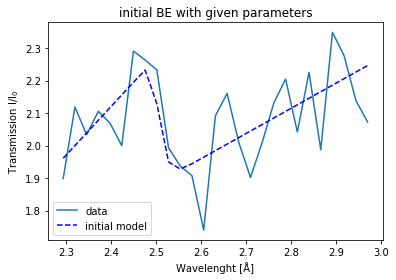

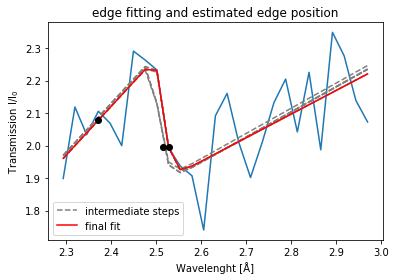

[[Model]]
    Model(BraggEdgeLinear)
[[Fit Statistics]]
    # fitting method   = least_squares
    # function evals   = 2
    # data points      = 27
    # variables        = 2
    chi-square         = 0.30367665
    reduced chi-square = 0.01214707
    Akaike info crit   = -117.165974
    Bayesian info crit = -114.574300
[[Variables]]
    t0:                 2.501231 (fixed)
    alpha:              0.01 (fixed)
    sigma:              0.01 (fixed)
    a1:                -0.06416692 +/- 0.02605735 (40.61%) (init = -0.05335974)
    a2:                 0.7744849 (fixed)
    a5:                -1.472662 (fixed)
    a6:                 1.50157149 +/- 0.01591317 (1.06%) (init = 1.497631)
    bool_transmission: -inf (fixed)

[[Model]]
    Model(BraggEdgeLinear)
[[Fit Statistics]]
    # fitting method   = least_squares
    # function evals   = 2
    # data points      = 27
    # variables        = 2
    chi-square         = 0.30366631
    reduced chi-square = 0.01214665
    Akaike info crit   

C:\ProgramData\Anaconda3\lib\site-packages\lmfit\minimizer.py:772: RuntimeWarning: invalid value encountered in sqrt
  par.stderr = sqrt(self.result.covar[ivar, ivar])
C:\ProgramData\Anaconda3\lib\site-packages\lmfit\minimizer.py:779: RuntimeWarning: invalid value encountered in sqrt
  (par.stderr * sqrt(self.result.covar[jvar, jvar])))


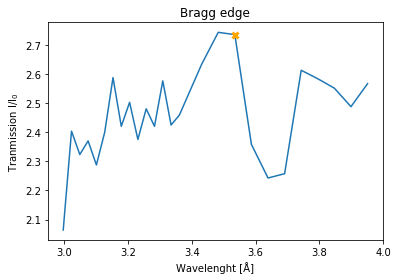

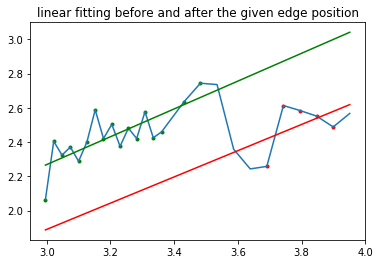

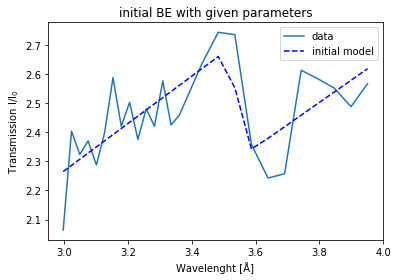

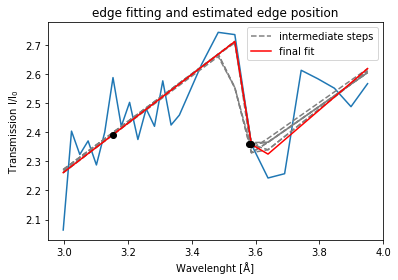

[[Model]]
    Model(BraggEdgeLinear)
[[Fit Statistics]]
    # fitting method   = least_squares
    # function evals   = 2
    # data points      = 26
    # variables        = 2
    chi-square         = 0.26833042
    reduced chi-square = 0.01118043
    Akaike info crit   = -114.914450
    Bayesian info crit = -112.398257
[[Variables]]
    t0:                 3.53466 (fixed)
    alpha:              0.01 (fixed)
    sigma:              0.01 (fixed)
    a1:                -0.42166399 +/- 0.03711798 (8.80%) (init = -0.408515)
    a2:                 0.7660724 (fixed)
    a5:                -0.1686654 (fixed)
    a6:                 0.81461854 +/- 0.00787079 (0.97%) (init = 0.8123063)
    bool_transmission: -inf (fixed)

[[Model]]
    Model(BraggEdgeLinear)
[[Fit Statistics]]
    # fitting method   = least_squares
    # function evals   = 2
    # data points      = 26
    # variables        = 2
    chi-square         = 0.26832221
    reduced chi-square = 0.01118009
    Akaike info crit   = 

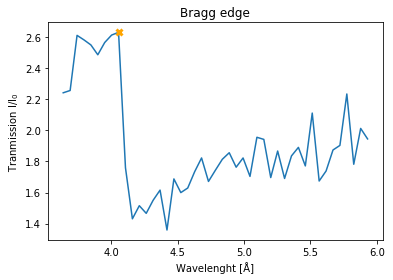

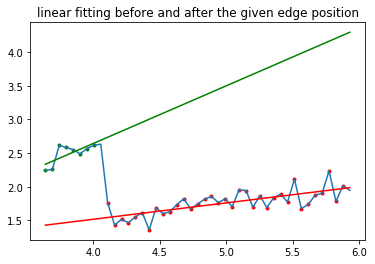

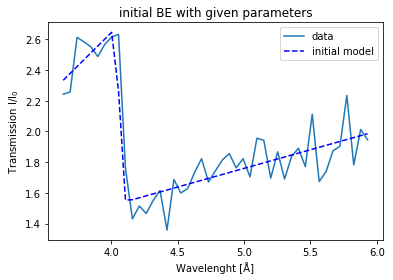

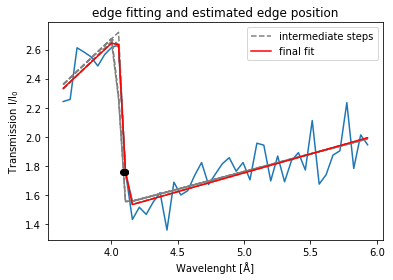

[[Model]]
    Model(BraggEdgeLinear)
[[Fit Statistics]]
    # fitting method   = least_squares
    # function evals   = 2
    # data points      = 45
    # variables        = 2
    chi-square         = 0.76990386
    reduced chi-square = 0.01790474
    Akaike info crit   = -179.066846
    Bayesian info crit = -175.453521
[[Variables]]
    t0:                 4.0555 (fixed)
    alpha:              0.01 (fixed)
    sigma:              0.01 (fixed)
    a1:                 0.54735799 +/- 0.02226705 (4.07%) (init = 0.5452188)
    a2:                 0.242885 (fixed)
    a5:                -0.780485 (fixed)
    a6:                 0.86359668 +/- 0.01204470 (1.39%) (init = 0.8558615)
    bool_transmission: -inf (fixed)

[[Model]]
    Model(BraggEdgeLinear)
[[Fit Statistics]]
    # fitting method   = least_squares
    # function evals   = 2
    # data points      = 45
    # variables        = 2
    chi-square         = 0.76985822
    reduced chi-square = 0.01790368
    Akaike info crit   = -17

In [36]:

est_sigma = 0.01
est_alpha = np.array([0.01,0.01,0.01,0.01,0.01,0.15])
results_Ni =[]
original_Ni =[]
for i in range(0, len(peak_pos_Ni)):
# for i in range(len(peak_pos_Ni)-5, len(peak_pos_Ni)-4):
    
    print(lambda_ranges_Ni[i,:])
    myrange = np.array([TOF_routines.find_nearest(lambda_bin, lambda_ranges_Ni[i,0]), TOF_routines.find_nearest(lambda_bin,lambda_ranges_Ni[i,1])])
    print(myrange)
    est_peak = TOF_routines.find_nearest(lambda_bin,peak_pos_Ni[i])

    curr_res = AdvancedBraggEdgeFitting_v2.AdvancedBraggEdgeFitting(Ni_4D_av, myrange, lambda_bin, est_peak, est_sigma, est_alpha[i], True, False, True, 0)
    results_Ni.append(curr_res)
    original_Ni.append(Ni_4D_av[myrange[0]:myrange[1]])

In [37]:
print(results_Ni[0]['t0']*2)
print(original_Ni[0])

4.285709119202813
[2.14023757 2.23857808 2.21099663 2.19278884 2.40471268 2.26657176
 2.17673802 2.23594213 2.1667695  2.09973693 1.84630632 1.68458998
 2.05706048 1.97600102 2.04758453 1.89900291 2.11906219 2.03375101
 2.10591292]


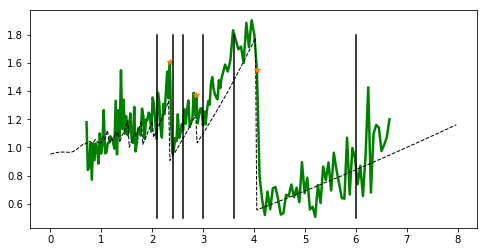

In [38]:
# I try also with Iron
# # hkl     multiplicity     d_hkl     |F|^2
#  1  1  0        12       2.027     344.177
#  2  0  0         6       1.433     331.620
#  2  1  1        24       1.170     319.521
#  2  2  0        12       1.013     307.863
#  3  1  0        24       0.906     296.631
#  2  2  2         8       0.827     285.809

Fe_4D_av = Fe5x5
lambda_ranges_Fe=np.zeros((3,2))


lambda_ranges_Fe[2,0] = 3.0
lambda_ranges_Fe[2,1] = 6.0

lambda_ranges_Fe[1,0] = 2.4
lambda_ranges_Fe[1,1] = 3.6

lambda_ranges_Fe[0,0] = 2.1
lambda_ranges_Fe[0,1] = 2.6


peak_pos_Fe = np.zeros(3)
peak_pos_Fe[0] = 1.170*2
peak_pos_Fe[1] = 1.433*2
peak_pos_Fe[2] = 2.027*2

plt.figure(figsize=(8,4))
plt.plot(lambda_bin, Fe_4D_av,'g', linewidth=2.5, label='Fe')
plt.plot(data_Fe[:,0],data_Fe[:,1],'--k',linewidth=1)
for i in range(0,3):
    plt.plot((lambda_ranges_Fe[i,0], lambda_ranges_Fe[i,0]),(0.5,1.8), 'k-')
    plt.plot((lambda_ranges_Fe[i,1], lambda_ranges_Fe[i,1]),(0.5,1.8), 'k-')
    plt.plot(peak_pos_Fe[i],Fe_4D_av[TOF_routines.find_nearest(peak_pos_Fe[i], lambda_bin)],'C1*')

[2.1 2.6]
[53 72]
0
Parameters([('t0', <Parameter 't0', 2.3691520777207895, bounds=[2.110600659246951:2.605401613080611]>), ('alpha', <Parameter 'alpha', 0.00158415580799316, bounds=[0.0:1.5]>), ('sigma', <Parameter 'sigma', 0.001473963170089036, bounds=[0.0:1.5]>), ('a1', <Parameter 'a1', -1.2152199113017397, bounds=[-inf:inf]>), ('a2', <Parameter 'a2', 0.9227807926791481, bounds=[-inf:inf]>), ('a5', <Parameter 'a5', -1.3236695034915624, bounds=[-inf:inf]>), ('a6', <Parameter 'a6', 1.1941026229103961, bounds=[-inf:inf]>), ('bool_transmission', <Parameter 'bool_transmission', value=-inf (fixed), bounds=[-inf:inf]>)])
[[Model]]
    Model(BraggEdgeLinear)
[[Fit Statistics]]
    # fitting method   = least_squares
    # function evals   = 6
    # data points      = 19
    # variables        = 7
    chi-square         = 0.19301127
    reduced chi-square = 0.01608427
    Akaike info crit   = -73.1994679
    Bayesian info crit = -66.5883951
##  Warning: uncertainties could not be estimated:
 

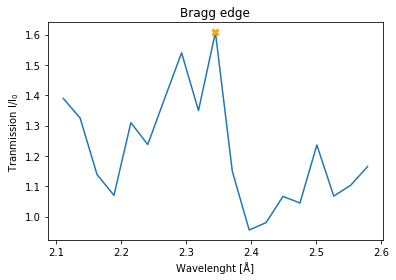

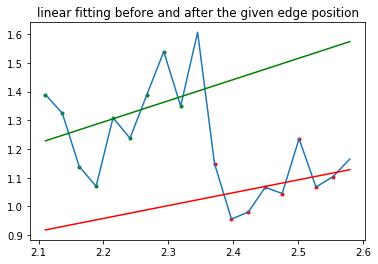

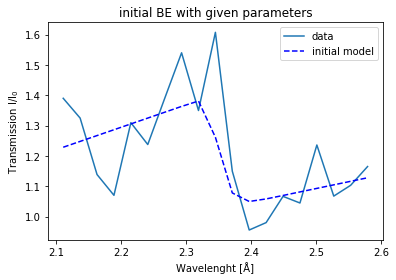

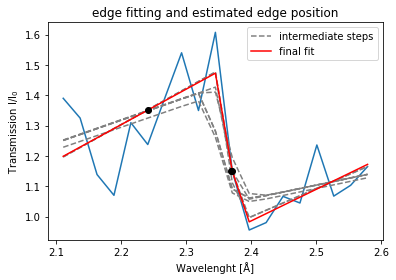

[[Model]]
    Model(BraggEdgeLinear)
[[Fit Statistics]]
    # fitting method   = least_squares
    # function evals   = 2
    # data points      = 19
    # variables        = 2
    chi-square         = 0.29414611
    reduced chi-square = 0.01730271
    Akaike info crit   = -75.1942350
    Bayesian info crit = -73.3053570
[[Variables]]
    t0:                 2.344982 (fixed)
    alpha:              0.01 (fixed)
    sigma:              0.01 (fixed)
    a1:                -0.01661909 +/- 0.04411350 (265.44%) (init = -0.0280091)
    a2:                 0.448139 (fixed)
    a5:                -0.329117 (fixed)
    a6:                 0.74924714 +/- 0.01932694 (2.58%) (init = 0.7379964)
    bool_transmission: -inf (fixed)

[[Model]]
    Model(BraggEdgeLinear)
[[Fit Statistics]]
    # fitting method   = least_squares
    # function evals   = 2
    # data points      = 19
    # variables        = 2
    chi-square         = 0.29412957
    reduced chi-square = 0.01730174
    Akaike info crit   

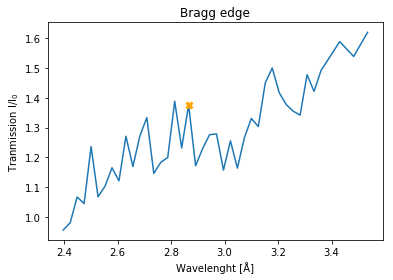

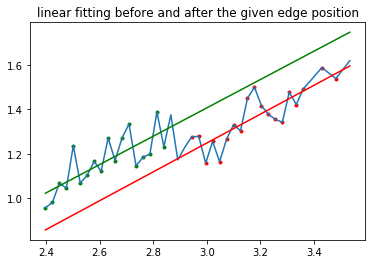

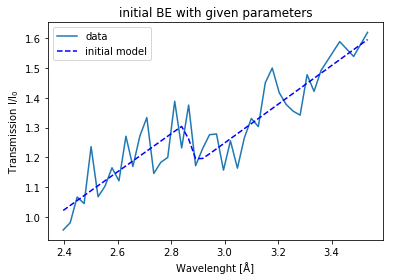

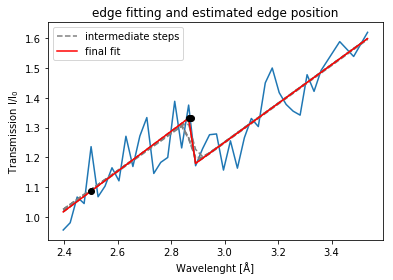

[[Model]]
    Model(BraggEdgeLinear)
[[Fit Statistics]]
    # fitting method   = least_squares
    # function evals   = 2
    # data points      = 41
    # variables        = 2
    chi-square         = 0.18953690
    reduced chi-square = 0.00485992
    Akaike info crit   = -216.446489
    Bayesian info crit = -213.019345
[[Variables]]
    t0:                 2.865822 (fixed)
    alpha:              0.01 (fixed)
    sigma:              0.01 (fixed)
    a1:                -0.69996608 +/- 0.01489748 (2.13%) (init = -0.7034144)
    a2:                 0.6505147 (fixed)
    a5:                -0.5099286 (fixed)
    a6:                 0.64044879 +/- 0.00618622 (0.97%) (init = 0.6388908)
    bool_transmission: -inf (fixed)

[[Model]]
    Model(BraggEdgeLinear)
[[Fit Statistics]]
    # fitting method   = least_squares
    # function evals   = 2
    # data points      = 41
    # variables        = 2
    chi-square         = 0.18953470
    reduced chi-square = 0.00485986
    Akaike info crit   

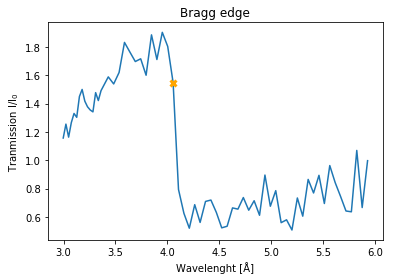

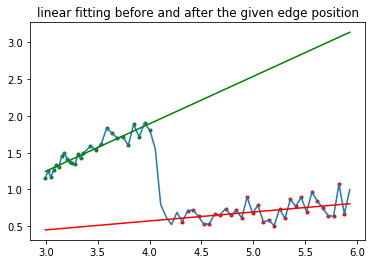

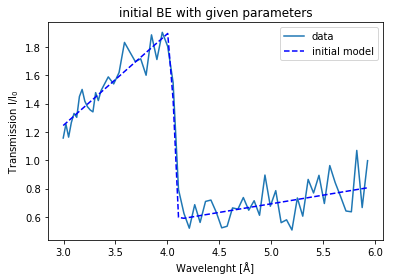

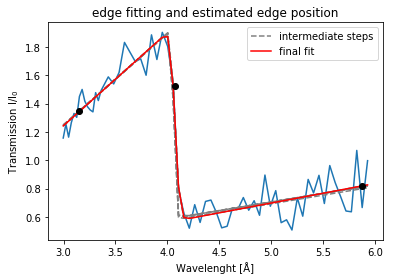

[[Model]]
    Model(BraggEdgeLinear)
[[Fit Statistics]]
    # fitting method   = least_squares
    # function evals   = 2
    # data points      = 64
    # variables        = 2
    chi-square         = 0.71415849
    reduced chi-square = 0.01151869
    Akaike info crit   = -283.714140
    Bayesian info crit = -279.396374
[[Variables]]
    t0:                 4.0555 (fixed)
    alpha:              0.01 (fixed)
    sigma:              0.01 (fixed)
    a1:                 0.09758240 +/- 0.01785875 (18.30%) (init = 0.0844949)
    a2:                 0.1216435 (fixed)
    a5:                -0.6872067 (fixed)
    a6:                 0.64602281 +/- 0.00595894 (0.92%) (init = 0.6450929)
    bool_transmission: -inf (fixed)

[[Model]]
    Model(BraggEdgeLinear)
[[Fit Statistics]]
    # fitting method   = least_squares
    # function evals   = 2
    # data points      = 64
    # variables        = 2
    chi-square         = 0.71414621
    reduced chi-square = 0.01151849
    Akaike info crit   = 

In [39]:
est_sigma = 0.01
est_alpha = np.array([0.01,0.01,0.01,0.01,0.01,0.15])
results_Fe =[]
original_Fe=[]
for i in range(0, len(peak_pos_Fe)):
# for i in range(0, 1):
    
    print(lambda_ranges_Fe[i,:])
    myrange = np.array([TOF_routines.find_nearest(lambda_bin, lambda_ranges_Fe[i,0]), TOF_routines.find_nearest(lambda_bin,lambda_ranges_Fe[i,1])])
    print(myrange)
    est_peak = TOF_routines.find_nearest(lambda_bin,peak_pos_Fe[i])

    curr_res = AdvancedBraggEdgeFitting_v2.AdvancedBraggEdgeFitting(Fe_4D_av, myrange, lambda_bin, est_peak, est_sigma, est_alpha[i], True, False, True, 0)
    results_Fe.append(curr_res)
    original_Fe.append(Fe_4D_av[myrange[0]:myrange[1]])

2.1428545596014064
2.5145359729457275
3.580542479055879
4.09000334900736
-2.185412344917697e-14
2.3694430629099688
2.873861226827506
4.073754834927825
-3.166535884543964e-08


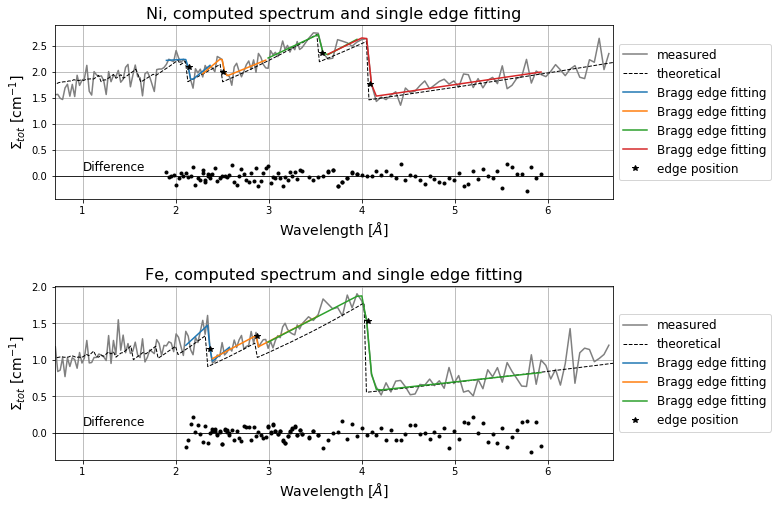

In [40]:
# here I try to make a plot with the fitting overimposed
plt.figure(figsize=(10,8))
ax1 = plt.subplot(211)
plt.plot(lambda_bin[:165], Ni_4D_av[:165],'grey', label='measured')
plt.plot(data_Ni[:,0],data_Ni[:,1],'--k',linewidth=1, label='theoretical')
# plt.xlim(np.min(lambda_bin),np.max(lambda_bin))
counts =0
mean_difference=np.zeros(4)
for i in range(0,4):
    x_Ni= lambda_bin[TOF_routines.find_nearest(lambda_bin, lambda_ranges_Ni[i,0]):TOF_routines.find_nearest(lambda_bin, lambda_ranges_Ni[i,1])]
    y_Ni= results_Ni[i]['fitted_data']
    print(results_Ni[i]['t0'])
#     x_edge = lambda_bin[TOF_routines.find_nearest(lambda_bin,results_Ni[i]['t0'] )]
    x_edge_Ni = results_Ni[i]['t0']
    y_edge_Ni = y_Ni[TOF_routines.find_nearest(x_Ni,x_edge_Ni)]
#     y_edge = results_Ni[i]['fitted_data'][TOF_routines.find_nearest(lambda_bin,results_Ni[i]['t0'] )]
    plt.plot(x_Ni,y_Ni, label='Bragg edge fitting')
    if i==3:
        plt.plot(x_edge_Ni, y_edge_Ni,'*', color='k', label='edge position')
    else:
        plt.plot(x_edge_Ni, y_edge_Ni,'*', color='k')    
    plt.plot(x_Ni, results_Ni[i]['fitted_data']-original_Ni[i], '.k')
    mean_difference = np.average(results_Ni[i]['fitted_data']-original_Ni[i])
#     print('average diff: ', np.average(results_Ni[i]['fitted_data']-original_Ni[i]), results_Ni[i]['fitted_data']-original_Ni[i])

# print(mean_difference)
diff_av = np.average((mean_difference))
print(diff_av)
plt.plot([0.7,6.7],[diff_av, diff_av],'-k', linewidth=0.8)
plt.text(1.0,0.1, 'Difference', fontsize=12)
plt.xlim([0.7,6.7])
plt.grid()
lg1 = ax1.legend(loc='center left', bbox_to_anchor=(1, 0.5), fontsize=12)
plt.title('Ni, computed spectrum and single edge fitting', fontsize=16)
plt.xlabel('Wavelength [$\AA$]',fontsize=14)
plt.ylabel('$\Sigma_{tot}$ [cm$^{-1}$]',fontsize=14)

ax2=plt.subplot(212)
plt.plot(lambda_bin[:165], Fe_4D_av[:165], 'grey', label='measured')
plt.plot(data_Fe[:,0],data_Fe[:,1],'--k',linewidth=1, label='theoretical')
# plt.xlim(np.min(lambda_bin),np.max(lambda_bin))
mean_difference=np.zeros(3)
for i in range(0,3):
    x_Fe= lambda_bin[TOF_routines.find_nearest(lambda_bin, lambda_ranges_Fe[i,0]):TOF_routines.find_nearest(lambda_bin, lambda_ranges_Fe[i,1])]
    y_Fe= results_Fe[i]['fitted_data']
    print(results_Fe[i]['t0'])
#     x_edge = lambda_bin[TOF_routines.find_nearest(lambda_bin,results_Ni[i]['t0'] )]
    x_edge_Fe = results_Fe[i]['t0']
    y_edge_Fe = y_Fe[TOF_routines.find_nearest(x_Fe,x_edge_Fe)]
#     y_edge = results_Ni[i]['fitted_data'][TOF_routines.find_nearest(lambda_bin,results_Ni[i]['t0'] )]
    plt.plot(x_Fe,y_Fe, label='Bragg edge fitting')
    if i==2:
        plt.plot(x_edge_Fe, y_edge_Fe,'*k', label='edge position')
    else:
        plt.plot(x_edge_Fe, y_edge_Fe,'*k')
    plt.plot(x_Fe, results_Fe[i]['fitted_data']-original_Fe[i], '.k')
    mean_difference = np.average(results_Fe[i]['fitted_data']-original_Fe[i])

diff_av = np.average((mean_difference))
print(diff_av)
plt.plot([0.7,6.7],[diff_av, diff_av],'-k', linewidth=0.8)
plt.text(1.0,0.1, 'Difference', fontsize=12)
plt.xlim([0.7,6.7])
plt.grid()
lg2 = ax2.legend(loc='center left', bbox_to_anchor=(1, 0.5), fontsize=12)
plt.title('Fe, computed spectrum and single edge fitting', fontsize=16)
plt.xlabel('Wavelength [$\AA$]',fontsize=14)
plt.ylabel('$\Sigma_{tot}$ [cm$^{-1}$]',fontsize=14)
plt.subplots_adjust(hspace=0.5)


plt.savefig('Figure_edgefitting.pdf',bbox_extra_artists=(lg1,lg2), bbox_inches='tight')

In [41]:
# lattice parameter for Ni and Fe
# NI:
Ni_a = np.zeros(4)

Ni_a[0]=(results_Ni[3]['t0']/2)*np.sqrt(1+1+1) # h,k,l=1,1,1
Ni_a[1]=(results_Ni[2]['t0']/2)*np.sqrt(4+0+0) #h,k,l = 2,0,0
Ni_a[2]=(results_Ni[1]['t0']/2)*np.sqrt(4+4+0) #h,k,l = 2,2,0
Ni_a[3]=(results_Ni[0]['t0']/2)*np.sqrt(9+1+1) # h,k,l = 3,1,1

print('Ni:')
print(results_Ni[0]['t0'],results_Ni[1]['t0'],results_Ni[2]['t0'], results_Ni[3]['t0'] )
print(np.average(Ni_a), np.std(Ni_a))

Fe_a = np.zeros(3)
Fe_a[0] = (results_Fe[2]['t0']/2)*np.sqrt(1+1+0) #h,k,l =1,1,0
Fe_a[1] = (results_Fe[1]['t0']/2)*np.sqrt(4+0+0) # h,k,l = 2,0,0
Fe_a[2] = (results_Fe[0]['t0']/2)*np.sqrt(4+1+1) # h,k,l = 2,1,1
print('Fe:')
print(results_Fe[0]['t0'],results_Fe[1]['t0'],results_Fe[2]['t0'] )
print(np.average(Fe_a), np.std(Fe_a))

Ni:
2.1428545596014064 2.5145359729457275 3.580542479055879 4.09000334900736
3.5580506085311554 0.014020987885969295
Fe:
2.3694430629099688 2.873861226827506 4.073754834927825
2.8854680449499397 0.01198201274130672


## 4D data analysis on the reconstructions obtained with corrected background 

In [42]:
%%time
## --- UNCOMMENT THIS AND THE FOLLOWING, IN CASE YOU SHOULD LOAD THE 4D DATA AGAIN TO DO ANALYSIS. NOW I AM USING 100 SLICES FOR THE ANALYSIS
## --- HERE I ALSO USE TIFF TO MORE WISELY READ THE DATA WITHOUT CRASHING


nBins=165 
# slice_first =269
# slice_end = 509
slice_first =400
slice_end = 500
nSlices = slice_end-slice_first
spectrum_img_BB_4D=np.zeros((476,476,nSlices,nBins))
# spectrum_img_BB_4D =[]
print(np.shape(spectrum_img_BB_4D))
for i in range (0, nBins):
    print('nBin: ....' , i)
    for j in range(slice_first, slice_end):
#         filename = 'D:\Kaestner\ISIS_IAEAData\RB1730044\PSI_Cylinder\Sample\RB1730044\Tomo_test\CT_recon_binSum_165bin_249_BBcorrected_const_dose\\bin'+str(i).zfill(4)+'\slice_'+str(j).zfill(4)+'.tif'
#         filename = 'D:\Kaestner\ISIS_IAEAData\RB1730044\PSI_Cylinder\Sample\RB1730044\Tomo_test\CT_recon_binSum_165bin_249_BBcorrected_const_dose_SampleScat_5percent_const\\bin'+str(i).zfill(4)+'\slice_'+str(j).zfill(4)+'.tif'
        filename = 'D:\Kaestner\ISIS_IAEAData\RB1730044\PSI_Cylinder\Sample\RB1730044\Tomo_test\CT_recon_binSum_165bin_249_BBcorrected_const_dose_SampleScat_7percent_const\\bin'+str(i).zfill(4)+'\slice_'+str(j).zfill(4)+'.tif'
    #         print(filename)
        with TiffFile(filename) as tif:
            spectrum_img_BB_4D[:,:,j-slice_first,i] = tif.asarray()

(476, 476, 100, 165)
nBin: .... 0
nBin: .... 1
nBin: .... 2
nBin: .... 3
nBin: .... 4
nBin: .... 5
nBin: .... 6
nBin: .... 7
nBin: .... 8
nBin: .... 9
nBin: .... 10
nBin: .... 11
nBin: .... 12
nBin: .... 13
nBin: .... 14
nBin: .... 15
nBin: .... 16
nBin: .... 17
nBin: .... 18
nBin: .... 19
nBin: .... 20
nBin: .... 21
nBin: .... 22
nBin: .... 23
nBin: .... 24
nBin: .... 25
nBin: .... 26
nBin: .... 27
nBin: .... 28
nBin: .... 29
nBin: .... 30
nBin: .... 31
nBin: .... 32
nBin: .... 33
nBin: .... 34
nBin: .... 35
nBin: .... 36
nBin: .... 37
nBin: .... 38
nBin: .... 39
nBin: .... 40
nBin: .... 41
nBin: .... 42
nBin: .... 43
nBin: .... 44
nBin: .... 45
nBin: .... 46
nBin: .... 47
nBin: .... 48
nBin: .... 49
nBin: .... 50
nBin: .... 51
nBin: .... 52
nBin: .... 53
nBin: .... 54
nBin: .... 55
nBin: .... 56
nBin: .... 57
nBin: .... 58
nBin: .... 59
nBin: .... 60
nBin: .... 61
nBin: .... 62
nBin: .... 63
nBin: .... 64
nBin: .... 65
nBin: .... 66
nBin: .... 67
nBin: .... 68
nBin: .... 69
nBin: ...

In [85]:
%%time
## --- UNCOMMENT THIS AND THE FOLLOWING, IN CASE YOU SHOULD LOAD THE 4D DATA AGAIN TO DO ANALYSIS. NOW I AM USING 100 SLICES FOR THE ANALYSIS
## --- HERE I ALSO USE TIFF TO MORE WISELY READ THE DATA WITHOUT CRASHING


nBins=165 
# slice_first =269
# slice_end = 509
slice_first =400
slice_end = 500
nSlices = slice_end-slice_first
spectrum_img_BB_4D_5pc=np.zeros((476,476,nSlices,nBins))
# spectrum_img_BB_4D =[]
print(np.shape(spectrum_img_BB_4D))
for i in range (0, nBins):
    print('nBin: ....' , i)
    for j in range(slice_first, slice_end):
#         filename = 'D:\Kaestner\ISIS_IAEAData\RB1730044\PSI_Cylinder\Sample\RB1730044\Tomo_test\CT_recon_binSum_165bin_249_BBcorrected_const_dose\\bin'+str(i).zfill(4)+'\slice_'+str(j).zfill(4)+'.tif'
#         filename = 'D:\Kaestner\ISIS_IAEAData\RB1730044\PSI_Cylinder\Sample\RB1730044\Tomo_test\CT_recon_binSum_165bin_249_BBcorrected_const_dose_SampleScat_5percent_const\\bin'+str(i).zfill(4)+'\slice_'+str(j).zfill(4)+'.tif'
        filename = 'D:\Kaestner\ISIS_IAEAData\RB1730044\PSI_Cylinder\Sample\RB1730044\Tomo_test\CT_recon_binSum_165bin_249_BBcorrected_const_dose_SampleScat_5percent_const\\bin'+str(i).zfill(4)+'\slice_'+str(j).zfill(4)+'.tif'
    #         print(filename)
        with TiffFile(filename) as tif:
            spectrum_img_BB_4D_5pc[:,:,j-slice_first,i] = tif.asarray()

(476, 476, 100, 165)
nBin: .... 0
nBin: .... 1
nBin: .... 2
nBin: .... 3
nBin: .... 4
nBin: .... 5
nBin: .... 6
nBin: .... 7
nBin: .... 8
nBin: .... 9
nBin: .... 10
nBin: .... 11
nBin: .... 12
nBin: .... 13
nBin: .... 14
nBin: .... 15
nBin: .... 16
nBin: .... 17
nBin: .... 18
nBin: .... 19
nBin: .... 20
nBin: .... 21
nBin: .... 22
nBin: .... 23
nBin: .... 24
nBin: .... 25
nBin: .... 26
nBin: .... 27
nBin: .... 28
nBin: .... 29
nBin: .... 30
nBin: .... 31
nBin: .... 32
nBin: .... 33
nBin: .... 34
nBin: .... 35
nBin: .... 36
nBin: .... 37
nBin: .... 38
nBin: .... 39
nBin: .... 40
nBin: .... 41
nBin: .... 42
nBin: .... 43
nBin: .... 44
nBin: .... 45
nBin: .... 46
nBin: .... 47
nBin: .... 48
nBin: .... 49
nBin: .... 50
nBin: .... 51
nBin: .... 52
nBin: .... 53
nBin: .... 54
nBin: .... 55
nBin: .... 56
nBin: .... 57
nBin: .... 58
nBin: .... 59
nBin: .... 60
nBin: .... 61
nBin: .... 62
nBin: .... 63
nBin: .... 64
nBin: .... 65
nBin: .... 66
nBin: .... 67
nBin: .... 68
nBin: .... 69
nBin: ...

In [43]:
# Here you have to choose this one or the following, depending if you already have saved those
np.save('fourD_data_BBconst_10pcSampleScat_400_500.npy', spectrum_img_BB_4D)

In [86]:
np.save('fourD_data_BBconst_05pcSampleScat_400_500.npy', spectrum_img_BB_4D_5pc)

In [ ]:
# spectrum_img_BB_4D = np.load('fourD_data_BBconst_dose_400_500.npy')
spectrum_img_BB_4D = np.load('fourD_data_BBconst_5pcSampleScat_400_500.npy')

In [45]:
# I divide the 4D regions with the different materials

Ti_4D = spectrum_img_BB_4D[150:200,80:130,:,:]
Fe_4D = spectrum_img_BB_4D[300:350, 80:130,:,:]
Cu_4D = spectrum_img_BB_4D[130:180,350:400,:,:]
Ni_4D = spectrum_img_BB_4D[380:430,230:280,:,:]
Pb_4D = spectrum_img_BB_4D[50:100,200:250,:,:]
Al_4D = spectrum_img_BB_4D[280:330, 330:380, :,:]


In [87]:
Ti_4D_5pc = spectrum_img_BB_4D_5pc[150:200,80:130,:,:]
Fe_4D_5pc = spectrum_img_BB_4D_5pc[300:350, 80:130,:,:]
Cu_4D_5pc = spectrum_img_BB_4D_5pc[130:180,350:400,:,:]
Ni_4D_5pc = spectrum_img_BB_4D_5pc[380:430,230:280,:,:]
Pb_4D_5pc = spectrum_img_BB_4D_5pc[50:100,200:250,:,:]
Al_4D_5pc = spectrum_img_BB_4D_5pc[280:330, 330:380, :,:]

In [46]:
nBins = np.shape(spectrum_img_BB_4D)[3]
nSlices = np.shape(spectrum_img_BB_4D)[2]
Ti_4D_av = np.zeros([nBins,nSlices])
Ti_4D_std = np.zeros(nBins)
Fe_4D_av = np.zeros([nBins,nSlices])
Fe_4D_std = np.zeros(nBins)
Cu_4D_av = np.zeros([nBins,nSlices])
Cu_4D_std = np.zeros(nBins)
Pb_4D_av = np.zeros([nBins,nSlices])
Pb_4D_std = np.zeros(nBins)
Ni_4D_av = np.zeros([nBins,nSlices])
Ni_4D_std = np.zeros(nBins)
Al_4D_std = np.zeros(nBins)
Al_4D_av = np.zeros([nBins,nSlices])


for i in range(0,165):
    for j in range(0,100):
        Ti_4D_av[i,j] = np.mean(Ti_4D[:,:,j,i])
        Fe_4D_av[i,j] = np.mean(Fe_4D[:,:,j,i])
        Cu_4D_av[i,j] = np.mean(Cu_4D[:,:,j,i])
        Pb_4D_av[i,j] = np.mean(Pb_4D[:,:,j,i])
        Ni_4D_av[i,j] = np.mean(Ni_4D[:,:,j,i])
        Al_4D_av[i,j] = np.mean(Al_4D[:,:,j,i])
    
    Ti_4D_std[i] = np.std(Ti_4D_av[i,:])
    Fe_4D_std[i] = np.std(Fe_4D_av[i,:])
    Cu_4D_std[i] = np.std(Cu_4D_av[i,:])
    Pb_4D_std[i] = np.std(Pb_4D_av[i,:])
    Ni_4D_std[i] = np.std(Ni_4D_av[i,:])
    Al_4D_std[i] = np.std(Al_4D_av[i,:])
        

In [88]:
nBins = np.shape(spectrum_img_BB_4D)[3]
nSlices = np.shape(spectrum_img_BB_4D)[2]
Ti_4D_av_5pc = np.zeros([nBins,nSlices])
Ti_4D_std_5pc = np.zeros(nBins)
Fe_4D_av_5pc = np.zeros([nBins,nSlices])
Fe_4D_std_5pc = np.zeros(nBins)
Cu_4D_av_5pc = np.zeros([nBins,nSlices])
Cu_4D_std_5pc = np.zeros(nBins)
Pb_4D_av_5pc = np.zeros([nBins,nSlices])
Pb_4D_std_5pc = np.zeros(nBins)
Ni_4D_av_5pc = np.zeros([nBins,nSlices])
Ni_4D_std_5pc = np.zeros(nBins)
Al_4D_std_5pc = np.zeros(nBins)
Al_4D_av_5pc = np.zeros([nBins,nSlices])


for i in range(0,165):
    for j in range(0,100):
        Ti_4D_av_5pc[i,j] = np.mean(Ti_4D_5pc[:,:,j,i])
        Fe_4D_av_5pc[i,j] = np.mean(Fe_4D_5pc[:,:,j,i])
        Cu_4D_av_5pc[i,j] = np.mean(Cu_4D_5pc[:,:,j,i])
        Pb_4D_av_5pc[i,j] = np.mean(Pb_4D_5pc[:,:,j,i])
        Ni_4D_av_5pc[i,j] = np.mean(Ni_4D_5pc[:,:,j,i])
        Al_4D_av_5pc[i,j] = np.mean(Al_4D_5pc[:,:,j,i])
    
    Ti_4D_std_5pc[i] = np.std(Ti_4D_av_5pc[i,:])
    Fe_4D_std_5pc[i] = np.std(Fe_4D_av_5pc[i,:])
    Cu_4D_std_5pc[i] = np.std(Cu_4D_av_5pc[i,:])
    Pb_4D_std_5pc[i] = np.std(Pb_4D_av_5pc[i,:])
    Ni_4D_std_5pc[i] = np.std(Ni_4D_av_5pc[i,:])
    Al_4D_std_5pc[i] = np.std(Al_4D_av_5pc[i,:])

### paper figure 

In [47]:
# hkl list
# load the theoretical hkl

dhkl_Ni = np.genfromtxt('Ni_hkl', usecols=4) 
h_Ni = np.genfromtxt('Ni_hkl', usecols=0) 
k_Ni = np.genfromtxt('Ni_hkl', usecols=1) 
l_Ni = np.genfromtxt('Ni_hkl', usecols=2) 

dhkl_Fe = np.genfromtxt('Fe_hkl', usecols=4) 
h_Fe = np.genfromtxt('Fe_hkl', usecols=0) 
k_Fe = np.genfromtxt('Fe_hkl', usecols=1) 
l_Fe = np.genfromtxt('Fe_hkl', usecols=2) 

dhkl_Ti = np.genfromtxt('Ti_hkl', usecols=4) 
h_Ti = np.genfromtxt('Ti_hkl', usecols=0) 
k_Ti = np.genfromtxt('Ti_hkl', usecols=1) 
l_Ti = np.genfromtxt('Ti_hkl', usecols=2) 

dhkl_Pb = np.genfromtxt('Pb_hkl', usecols=4) 
h_Pb = np.genfromtxt('Pb_hkl', usecols=0) 
k_Pb = np.genfromtxt('Pb_hkl', usecols=1) 
l_Pb = np.genfromtxt('Pb_hkl', usecols=2) 

dhkl_Cu = np.genfromtxt('Cu_hkl', usecols=4) 
h_Cu = np.genfromtxt('Cu_hkl', usecols=0) 
k_Cu = np.genfromtxt('Cu_hkl', usecols=1) 
l_Cu = np.genfromtxt('Cu_hkl', usecols=2) 

dhkl_Al = np.genfromtxt('Al_hkl', usecols=4) 
h_Al = np.genfromtxt('Al_hkl', usecols=0) 
k_Al = np.genfromtxt('Al_hkl', usecols=1) 
l_Al = np.genfromtxt('Al_hkl', usecols=2) 
    

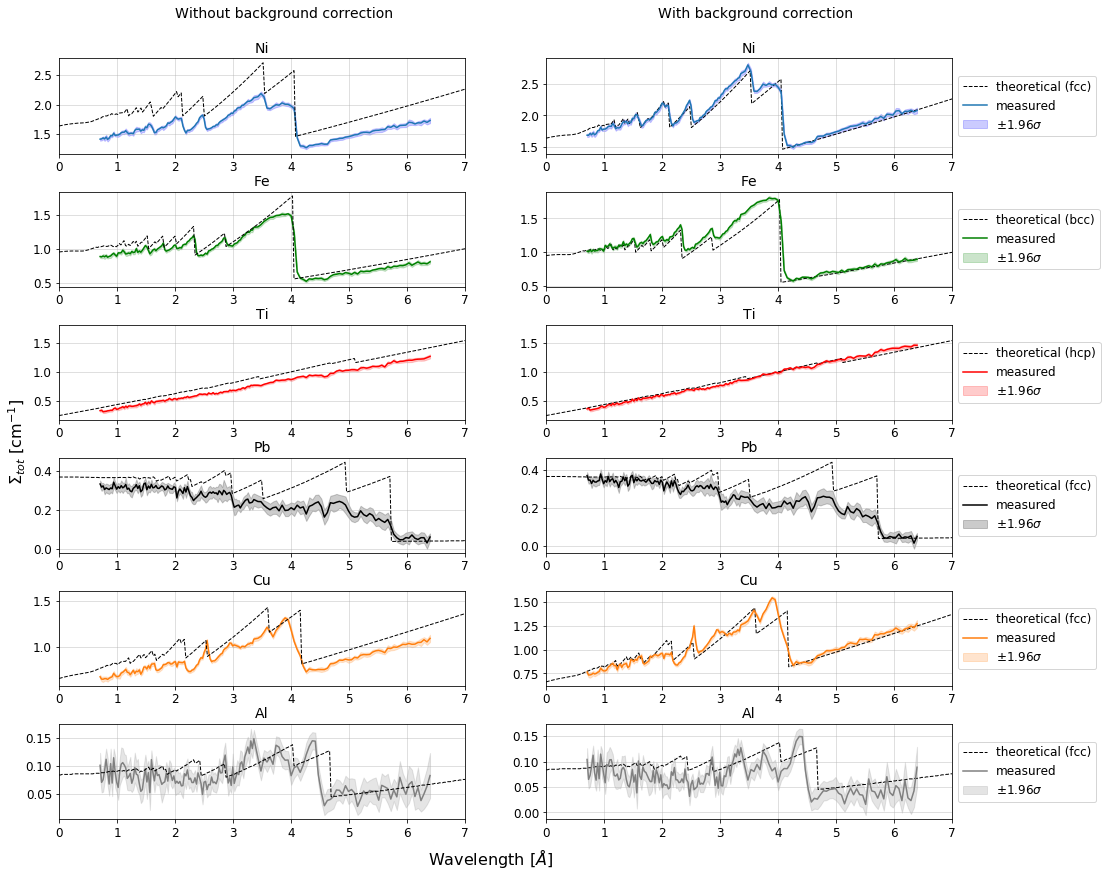

In [48]:
#Here i re-do the biggest plot, but with the updated std, i.e. the std computed between slices when using  a50x50 ROI

fig, ax = plt.subplots(nrows=3, ncols=3, sharex=True, sharey=True, figsize=(16, 14))

plt.subplot(621)
plt.plot(lambda_bin[:160], Ni[:160])
plt.fill_between(lambda_bin[:160], Ni[:160]-1.96*Ni_4D_std[:160], Ni[:160]+1.96*Ni_4D_std[:160], color='b', alpha=0.2)
plt.plot(data_Ni[:,0],data_Ni[:,1],'--k',linewidth=1)
plt.title('Ni', fontsize=14) 
plt.grid(alpha=0.5)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.xlim([0,7])

ax1 = plt.subplot(622)
plt.plot(data_Ni[:,0],data_Ni[:,1],'--k',linewidth=1,label='theoretical (fcc)')
plt.plot(lambda_bin[:160], Ni_BB[:160], label='measured')
plt.fill_between(lambda_bin[:160], Ni_BB[:160]-1.96*Ni_4D_std[:160], Ni_BB[:160]+1.96*Ni_4D_std[:160], color='b', alpha=0.2, label='$\pm1.96\sigma$')
plt.title('Ni', fontsize=14) 
plt.grid(alpha=0.5)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.xlim([0,7])

# for i in range(0,4):
#     plt.plot(np.array([2*dhkl_Ni[i], 2*dhkl_Ni[i]]), np.array([1.5,3.0]),'-', color='gray')
#     mytext = '('+str((h_Ni[i]).astype(int))+','+str(k_Ni[i].astype(int))+','+str(l_Ni[i].astype(int))+')'
#     plt.text(2*dhkl_Ni[i],2.0, mytext, rotation=45, color='k')

lg1 = ax1.legend(loc='center left', bbox_to_anchor=(1, 0.5), fontsize=12)

ax2 = plt.subplot(624)
plt.plot(data_Fe[:,0],data_Fe[:,1],'--k',linewidth=1, label='theoretical (bcc)')
plt.plot(lambda_bin[:160], Fe_BB[:160],'g', label='measured')
plt.fill_between(lambda_bin[:160], Fe_BB[:160]-1.96*Fe_4D_std[:160], Fe_BB[:160]+1.96*Fe_4D_std[:160], color='g', alpha=0.2, label='$\pm1.96\sigma$')
plt.title('Fe', fontsize=14)
plt.grid(alpha=0.5)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.xlim([0,7])
lg2 = ax2.legend(loc='center left', bbox_to_anchor=(1, 0.5), fontsize=12)

# for i in range(0,4):
#     plt.plot(np.array([2*dhkl_Fe[i], 2*dhkl_Fe[i]]), np.array([0.5,2.0]),'-', color='gray')
#     mytext = '('+str((h_Fe[i]).astype(int))+','+str(k_Fe[i].astype(int))+','+str(l_Fe[i].astype(int))+')'
#     plt.text(2*dhkl_Fe[i],0.9, mytext, rotation=45, color='k')

plt.subplot(623)
plt.plot(lambda_bin[:160], Fe[:160],'g')
plt.plot(data_Fe[:,0],data_Fe[:,1],'--k',linewidth=1)
plt.fill_between(lambda_bin[:160], Fe[:160]-1.96*Fe_4D_std[:160], Fe[:160]+1.96*Fe_4D_std[:160], color='g', alpha=0.2)
plt.title('Fe', fontsize=14)
plt.grid(alpha=0.5)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.xlim([0,7])

ax3 = plt.subplot(626)
plt.plot(data_Ti[:,0],data_Ti[:,1],'--k',linewidth=1, label='theoretical (hcp)')
plt.plot(lambda_bin[:160], Ti_BB[:160],'r', label='measured')
plt.fill_between(lambda_bin[:160], Ti_BB[:160]-1.96*Ti_4D_std[:160], Ti_BB[:160]+1.96*Ti_4D_std[:160], color='r', alpha=0.2, label='$\pm1.96\sigma$')
plt.title('Ti', fontsize=14)
plt.grid(alpha=0.5)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.xlim([0,7])
lg3 = ax3.legend(loc='center left', bbox_to_anchor=(1, 0.5), fontsize=12)
# for i in range(0,4):
#     plt.plot(np.array([2*dhkl_Ti[i], 2*dhkl_Ti[i]]), np.array([0.0,1.8]),'-', color='gray')
#     mytext = '('+str((h_Ti[i]).astype(int))+','+str(k_Ti[i].astype(int))+','+str(l_Ti[i].astype(int))+')'
#     plt.text(2*dhkl_Ti[i],1.6, mytext, rotation=45, color='k')

plt.subplot(625)
plt.plot(lambda_bin[:160], Ti[:160],'r')
plt.plot(data_Ti[:,0],data_Ti[:,1],'--k',linewidth=1)
plt.fill_between(lambda_bin[:160], Ti[:160]-1.96*Ti_4D_std[:160], Ti[:160]+1.96*Ti_4D_std[:160], color='r', alpha=0.2)
plt.title('Ti', fontsize=14)
plt.grid(alpha=0.5)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.xlim([0,7])

ax4 = plt.subplot(628)
plt.plot(data_Pb[:,0],data_Pb[:,1],'--k',linewidth=1, label='theoretical (fcc)')
plt.plot(lambda_bin[:160], Pb_BB[:160], 'k', label='measured')
plt.fill_between(lambda_bin[:160], Pb_BB[:160]-1.96*Pb_4D_std[:160], Pb_BB[:160]+1.96*Pb_4D_std[:160], color='k', alpha=0.2, label='$\pm1.96\sigma$')
plt.title('Pb', fontsize=14)
plt.grid(alpha=0.5)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.xlim([0,7])
lg4 = ax4.legend(loc='center left', bbox_to_anchor=(1, 0.5), fontsize=12)
# for i in range(0,4):
#     plt.plot(np.array([2*dhkl_Pb[i], 2*dhkl_Pb[i]]), np.array([0.0,0.5]),'-', color='gray')
#     mytext = '('+str((h_Pb[i]).astype(int))+','+str(k_Pb[i].astype(int))+','+str(l_Pb[i].astype(int))+')'
#     plt.text(2*dhkl_Pb[i],0.45, mytext, rotation=45, color='k')

plt.subplot(627)
plt.plot(lambda_bin[:160], Pb[:160], 'k')
plt.plot(data_Pb[:,0],data_Pb[:,1],'--k',linewidth=1)
plt.fill_between(lambda_bin[:160], Pb[:160]-1.96*Pb_4D_std[:160], Pb[:160]+1.96*Pb_4D_std[:160], color='k', alpha=0.2)
plt.title('Pb', fontsize=14)
plt.grid(alpha=0.5)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.xlim([0,7])

ax5 = plt.subplot(6,2,10)
plt.plot(data_Cu[:,0],data_Cu[:,1],'--k',linewidth=1, label='theoretical (fcc)')
plt.plot(lambda_bin[:160], Cu_BB[:160], 'C1', label='measured')
plt.fill_between(lambda_bin[:160], Cu_BB[:160]-1.96*Cu_4D_std[:160], Cu_BB[:160]+1.96*Cu_4D_std[:160], color='C1', alpha=0.2, label='$\pm1.96\sigma$')
plt.title('Cu', fontsize=14)
plt.grid(alpha=0.5)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.xlim([0,7])
lg5 = ax5.legend(loc='center left', bbox_to_anchor=(1, 0.5), fontsize=12)

# for i in range(0,4):
#     plt.plot(np.array([2*dhkl_Cu[i], 2*dhkl_Cu[i]]), np.array([0.0,1.7]),'-', color='gray')
#     mytext = '('+str((h_Cu[i]).astype(int))+','+str(k_Cu[i].astype(int))+','+str(l_Cu[i].astype(int))+')'
#     plt.text(2*dhkl_Cu[i],0.4, mytext, rotation=45, color='k')

plt.subplot(629)
plt.plot(lambda_bin[:160], Cu[:160], 'C1')
plt.plot(data_Cu[:,0],data_Cu[:,1],'--k',linewidth=1)
plt.fill_between(lambda_bin[:160], Cu[:160]-1.96*Cu_4D_std[:160], Cu[:160]+1.96*Cu_4D_std[:160], color='C1', alpha=0.2)
plt.title('Cu', fontsize=14)
plt.grid(alpha=0.5)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.xlim([0,7])

ax6 = plt.subplot(6,2,12)
plt.plot(data_Al[:,0],data_Al[:,1],'--k',linewidth=1, label='theoretical (fcc)')
plt.plot(lambda_bin[:160], Al_BB[:160], 'gray', label='measured')
plt.fill_between(lambda_bin[:160], Al_BB[:160]-1.96*Al_4D_std[:160], Al_BB[:160]+1.96*Al_4D_std[:160], color='gray', alpha=0.2, label='$\pm1.96\sigma$')
plt.title('Al', fontsize=14)
plt.grid(alpha=0.5)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.xlim([0,7])
lg6 = ax6.legend(loc='center left', bbox_to_anchor=(1, 0.5), fontsize=12)

# for i in range(0,4):
#     plt.plot(np.array([2*dhkl_Al[i], 2*dhkl_Al[i]]), np.array([0.0,0.2]),'-', color='gray')
#     mytext = '('+str((h_Al[i]).astype(int))+','+str(k_Al[i].astype(int))+','+str(l_Al[i].astype(int))+')'
#     plt.text(2*dhkl_Al[i],0.2, mytext, rotation=45, color='k')
    
plt.subplot(6,2,11)
plt.plot(lambda_bin[:160], Al[:160], 'gray')
plt.plot(data_Al[:,0],data_Al[:,1],'--k',linewidth=1)
plt.fill_between(lambda_bin[:160], Al[:160]-1.96*Al_4D_std[:160], Al[:160]+1.96*Al_4D_std[:160], color='gray', alpha=0.2)
plt.title('Al', fontsize=14)
plt.grid(alpha=0.5)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.xlim([0,7])


plt.subplots_adjust(hspace=0.4)
text_x = fig.text(0.5, 0.08, 'Wavelength [$\AA$]', ha='center',fontsize=16)
text_y = fig.text(0.08, 0.5, '$\Sigma_{tot}$ [cm$^{-1}$]', va='center', rotation='vertical', fontsize=16)
title_1 = fig.text(0.32, 0.92, 'Without background correction', ha='center',fontsize=14)
title_2 = fig.text(0.73, 0.92, 'With background correction', ha='center',fontsize=14)

plt.savefig('spectra_plots_BB_andNOT_dose_50x50_sigma.pdf',bbox_extra_artists=(lg1,lg2,lg3,lg4,lg5,lg6, text_x,text_y,title_1,title_2), bbox_inches='tight')
# plt.savefig('spectra_plots_BB_andNOT_dose_50x50_sigma_withHKL.pdf',bbox_extra_artists=(lg1,lg2,lg3,lg4,lg5,lg6, text_x,text_y,title_1,title_2), bbox_inches='tight')

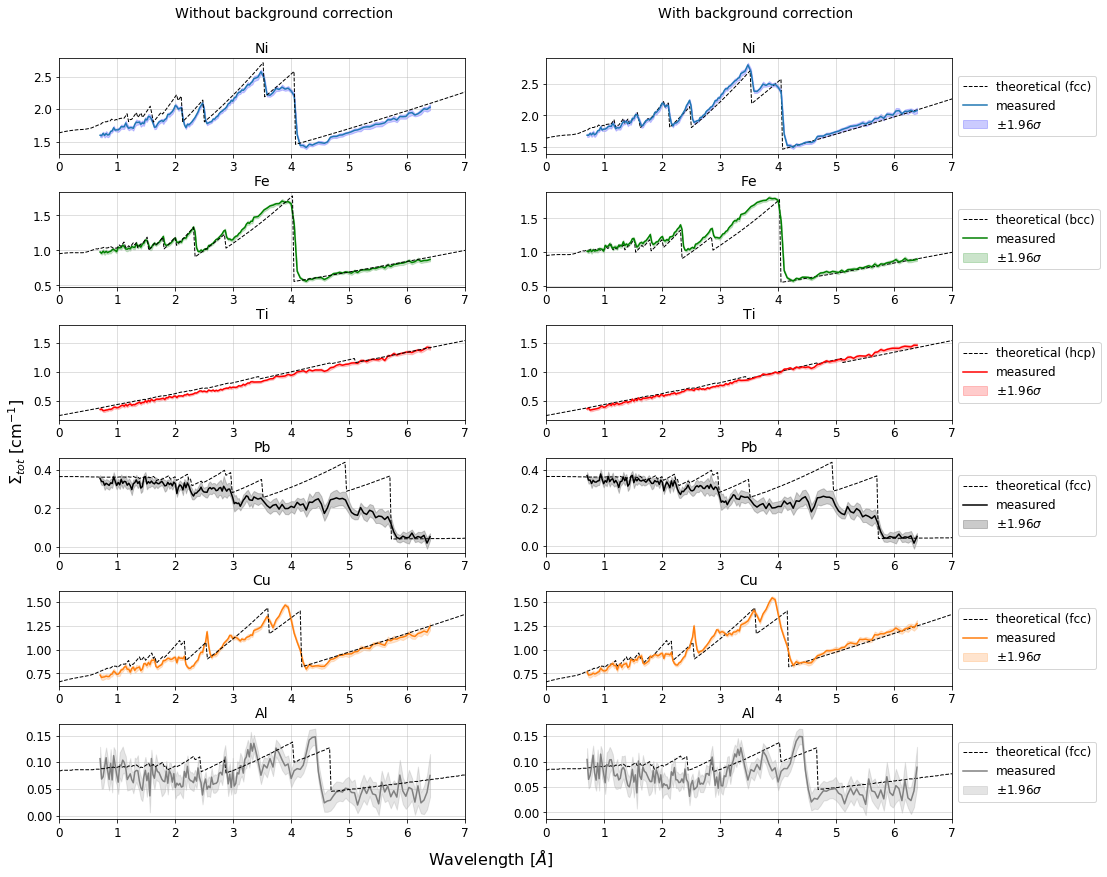

In [101]:
#Here i re-do the biggest plot, but with the updated std, i.e. the std computed between slices when using  a50x50 ROI

fig, ax = plt.subplots(nrows=3, ncols=3, sharex=True, sharey=True, figsize=(16, 14))

plt.subplot(621)
plt.plot(lambda_bin[:160], Ni_BB_5pc[:160])
plt.fill_between(lambda_bin[:160], Ni_BB_5pc[:160]-1.96*Ni_4D_std_5pc[:160], Ni_BB_5pc[:160]+1.96*Ni_4D_std_5pc[:160], color='b', alpha=0.2)
plt.plot(data_Ni[:,0],data_Ni[:,1],'--k',linewidth=1)
plt.title('Ni', fontsize=14) 
plt.grid(alpha=0.5)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.xlim([0,7])

ax1 = plt.subplot(622)
plt.plot(data_Ni[:,0],data_Ni[:,1],'--k',linewidth=1,label='theoretical (fcc)')
plt.plot(lambda_bin[:160], Ni_BB[:160], label='measured')
plt.fill_between(lambda_bin[:160], Ni_BB[:160]-1.96*Ni_4D_std[:160], Ni_BB[:160]+1.96*Ni_4D_std[:160], color='b', alpha=0.2, label='$\pm1.96\sigma$')
plt.title('Ni', fontsize=14) 
plt.grid(alpha=0.5)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.xlim([0,7])

# for i in range(0,4):
#     plt.plot(np.array([2*dhkl_Ni[i], 2*dhkl_Ni[i]]), np.array([1.5,3.0]),'-', color='gray')
#     mytext = '('+str((h_Ni[i]).astype(int))+','+str(k_Ni[i].astype(int))+','+str(l_Ni[i].astype(int))+')'
#     plt.text(2*dhkl_Ni[i],2.0, mytext, rotation=45, color='k')

lg1 = ax1.legend(loc='center left', bbox_to_anchor=(1, 0.5), fontsize=12)

ax2 = plt.subplot(624)
plt.plot(data_Fe[:,0],data_Fe[:,1],'--k',linewidth=1, label='theoretical (bcc)')
plt.plot(lambda_bin[:160], Fe_BB[:160],'g', label='measured')
plt.fill_between(lambda_bin[:160], Fe_BB[:160]-1.96*Fe_4D_std[:160], Fe_BB[:160]+1.96*Fe_4D_std[:160], color='g', alpha=0.2, label='$\pm1.96\sigma$')
plt.title('Fe', fontsize=14)
plt.grid(alpha=0.5)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.xlim([0,7])
lg2 = ax2.legend(loc='center left', bbox_to_anchor=(1, 0.5), fontsize=12)

# for i in range(0,4):
#     plt.plot(np.array([2*dhkl_Fe[i], 2*dhkl_Fe[i]]), np.array([0.5,2.0]),'-', color='gray')
#     mytext = '('+str((h_Fe[i]).astype(int))+','+str(k_Fe[i].astype(int))+','+str(l_Fe[i].astype(int))+')'
#     plt.text(2*dhkl_Fe[i],0.9, mytext, rotation=45, color='k')

plt.subplot(623)
plt.plot(lambda_bin[:160], Fe_BB_5pc[:160],'g')
plt.plot(data_Fe[:,0],data_Fe[:,1],'--k',linewidth=1)
plt.fill_between(lambda_bin[:160], Fe_BB_5pc[:160]-1.96*Fe_4D_std_5pc[:160], Fe_BB_5pc[:160]+1.96*Fe_4D_std_5pc[:160], color='g', alpha=0.2)
plt.title('Fe', fontsize=14)
plt.grid(alpha=0.5)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.xlim([0,7])

ax3 = plt.subplot(626)
plt.plot(data_Ti[:,0],data_Ti[:,1],'--k',linewidth=1, label='theoretical (hcp)')
plt.plot(lambda_bin[:160], Ti_BB[:160],'r', label='measured')
plt.fill_between(lambda_bin[:160], Ti_BB[:160]-1.96*Ti_4D_std[:160], Ti_BB[:160]+1.96*Ti_4D_std[:160], color='r', alpha=0.2, label='$\pm1.96\sigma$')
plt.title('Ti', fontsize=14)
plt.grid(alpha=0.5)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.xlim([0,7])
lg3 = ax3.legend(loc='center left', bbox_to_anchor=(1, 0.5), fontsize=12)
# for i in range(0,4):
#     plt.plot(np.array([2*dhkl_Ti[i], 2*dhkl_Ti[i]]), np.array([0.0,1.8]),'-', color='gray')
#     mytext = '('+str((h_Ti[i]).astype(int))+','+str(k_Ti[i].astype(int))+','+str(l_Ti[i].astype(int))+')'
#     plt.text(2*dhkl_Ti[i],1.6, mytext, rotation=45, color='k')

plt.subplot(625)
plt.plot(lambda_bin[:160], Ti_BB_5pc[:160],'r')
plt.plot(data_Ti[:,0],data_Ti[:,1],'--k',linewidth=1)
plt.fill_between(lambda_bin[:160], Ti_BB_5pc[:160]-1.96*Ti_4D_std[:160], Ti_BB_5pc[:160]+1.96*Ti_4D_std[:160], color='r', alpha=0.2)
plt.title('Ti', fontsize=14)
plt.grid(alpha=0.5)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.xlim([0,7])

ax4 = plt.subplot(628)
plt.plot(data_Pb[:,0],data_Pb[:,1],'--k',linewidth=1, label='theoretical (fcc)')
plt.plot(lambda_bin[:160], Pb_BB[:160], 'k', label='measured')
plt.fill_between(lambda_bin[:160], Pb_BB[:160]-1.96*Pb_4D_std[:160], Pb_BB[:160]+1.96*Pb_4D_std[:160], color='k', alpha=0.2, label='$\pm1.96\sigma$')
plt.title('Pb', fontsize=14)
plt.grid(alpha=0.5)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.xlim([0,7])
lg4 = ax4.legend(loc='center left', bbox_to_anchor=(1, 0.5), fontsize=12)
# for i in range(0,4):
#     plt.plot(np.array([2*dhkl_Pb[i], 2*dhkl_Pb[i]]), np.array([0.0,0.5]),'-', color='gray')
#     mytext = '('+str((h_Pb[i]).astype(int))+','+str(k_Pb[i].astype(int))+','+str(l_Pb[i].astype(int))+')'
#     plt.text(2*dhkl_Pb[i],0.45, mytext, rotation=45, color='k')

plt.subplot(627)
plt.plot(lambda_bin[:160], Pb_BB_5pc[:160], 'k')
plt.plot(data_Pb[:,0],data_Pb[:,1],'--k',linewidth=1)
plt.fill_between(lambda_bin[:160], Pb_BB_5pc[:160]-1.96*Pb_4D_std[:160], Pb_BB_5pc[:160]+1.96*Pb_4D_std[:160], color='k', alpha=0.2)
plt.title('Pb', fontsize=14)
plt.grid(alpha=0.5)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.xlim([0,7])

ax5 = plt.subplot(6,2,10)
plt.plot(data_Cu[:,0],data_Cu[:,1],'--k',linewidth=1, label='theoretical (fcc)')
plt.plot(lambda_bin[:160], Cu_BB[:160], 'C1', label='measured')
plt.fill_between(lambda_bin[:160], Cu_BB[:160]-1.96*Cu_4D_std[:160], Cu_BB[:160]+1.96*Cu_4D_std[:160], color='C1', alpha=0.2, label='$\pm1.96\sigma$')
plt.title('Cu', fontsize=14)
plt.grid(alpha=0.5)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.xlim([0,7])
lg5 = ax5.legend(loc='center left', bbox_to_anchor=(1, 0.5), fontsize=12)

# for i in range(0,4):
#     plt.plot(np.array([2*dhkl_Cu[i], 2*dhkl_Cu[i]]), np.array([0.0,1.7]),'-', color='gray')
#     mytext = '('+str((h_Cu[i]).astype(int))+','+str(k_Cu[i].astype(int))+','+str(l_Cu[i].astype(int))+')'
#     plt.text(2*dhkl_Cu[i],0.4, mytext, rotation=45, color='k')

plt.subplot(629)
plt.plot(lambda_bin[:160], Cu_BB_5pc[:160], 'C1')
plt.plot(data_Cu[:,0],data_Cu[:,1],'--k',linewidth=1)
plt.fill_between(lambda_bin[:160], Cu_BB_5pc[:160]-1.96*Cu_4D_std[:160], Cu_BB_5pc[:160]+1.96*Cu_4D_std[:160], color='C1', alpha=0.2)
plt.title('Cu', fontsize=14)
plt.grid(alpha=0.5)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.xlim([0,7])

ax6 = plt.subplot(6,2,12)
plt.plot(data_Al[:,0],data_Al[:,1],'--k',linewidth=1, label='theoretical (fcc)')
plt.plot(lambda_bin[:160], Al_BB[:160], 'gray', label='measured')
plt.fill_between(lambda_bin[:160], Al_BB[:160]-1.96*Al_4D_std[:160], Al_BB[:160]+1.96*Al_4D_std[:160], color='gray', alpha=0.2, label='$\pm1.96\sigma$')
plt.title('Al', fontsize=14)
plt.grid(alpha=0.5)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.xlim([0,7])
lg6 = ax6.legend(loc='center left', bbox_to_anchor=(1, 0.5), fontsize=12)

# for i in range(0,4):
#     plt.plot(np.array([2*dhkl_Al[i], 2*dhkl_Al[i]]), np.array([0.0,0.2]),'-', color='gray')
#     mytext = '('+str((h_Al[i]).astype(int))+','+str(k_Al[i].astype(int))+','+str(l_Al[i].astype(int))+')'
#     plt.text(2*dhkl_Al[i],0.2, mytext, rotation=45, color='k')
    
plt.subplot(6,2,11)
plt.plot(lambda_bin[:160], Al_BB_5pc[:160], 'gray')
plt.plot(data_Al[:,0],data_Al[:,1],'--k',linewidth=1)
plt.fill_between(lambda_bin[:160], Al_BB_5pc[:160]-1.96*Al_4D_std[:160], Al_BB_5pc[:160]+1.96*Al_4D_std[:160], color='gray', alpha=0.2)
plt.title('Al', fontsize=14)
plt.grid(alpha=0.5)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.xlim([0,7])


plt.subplots_adjust(hspace=0.4)
text_x = fig.text(0.5, 0.08, 'Wavelength [$\AA$]', ha='center',fontsize=16)
text_y = fig.text(0.08, 0.5, '$\Sigma_{tot}$ [cm$^{-1}$]', va='center', rotation='vertical', fontsize=16)
title_1 = fig.text(0.32, 0.92, 'Without background correction', ha='center',fontsize=14)
title_2 = fig.text(0.73, 0.92, 'With background correction', ha='center',fontsize=14)

# plt.savefig('spectra_plots_BB_andNOT_dose_50x50_sigma.pdf',bbox_extra_artists=(lg1,lg2,lg3,lg4,lg5,lg6, text_x,text_y,title_1,title_2), bbox_inches='tight')
# plt.savefig('spectra_plots_BB_andNOT_dose_50x50_sigma_withHKL.pdf',bbox_extra_artists=(lg1,lg2,lg3,lg4,lg5,lg6, text_x,text_y,title_1,title_2), bbox_inches='tight'

## Here I re-do the SNR study, using possibly a more meaningfull definition, from the 4D datasets, this is then the one to use for the paper

In [ ]:
nBins = np.shape(spectrum_img_BB_4D)[3] #165
nSlices = np.shape(spectrum_img_BB_4D)[2] #100
timesteps=50 # number of different regions 

Ti_4D_av = np.zeros([nSlices, nBins, timesteps])
Fe_4D_av = np.zeros([nSlices, nBins, timesteps])
Cu_4D_av = np.zeros([nSlices, nBins,timesteps])
Pb_4D_av = np.zeros([nSlices, nBins,timesteps])
Ni_4D_av = np.zeros([nSlices, nBins,timesteps])
Al_4D_av = np.zeros([nSlices, nBins,timesteps])
SNR_4D_Ti = np.zeros(timesteps)
SNR_4D_Fe = np.zeros(timesteps)
SNR_4D_Cu = np.zeros(timesteps)
SNR_4D_Pb = np.zeros(timesteps)
SNR_4D_Ni = np.zeros(timesteps)
SNR_4D_Al = np.zeros(timesteps)


curr_x1=25
curr_x2=25
curr_y1=25
curr_y2=25

num_pixels = np.zeros(timesteps)
for k in range(0,timesteps): 
    
    if k % 2 == 0: #Even
        curr_x2 =curr_x2+1
        curr_y2 =curr_y2+1
    else: #Odd
        curr_x1 = curr_x1-1
        curr_y1 = curr_y1-1
        

    num_pixels[k] = np.size(Ti_4D[curr_x1:curr_x2,curr_y1:curr_y2,0,0])
    
#     print(curr_x1,curr_x2, curr_y1, curr_y2)
            
    for j in range(0,nBins):       
        for i in range(0,nSlices):
            Ti_4D_av[i,j,k] = np.average(Ti_4D[curr_x1:curr_x2,curr_y1:curr_y2,i,j])
            Fe_4D_av[i,j,k] = np.average(Fe_4D[curr_x1:curr_x2,curr_y1:curr_y2,i,j])
            Cu_4D_av[i,j,k] = np.average(Cu_4D[curr_x1:curr_x2,curr_y1:curr_y2,i,j])
            Pb_4D_av[i,j,k] = np.average(Pb_4D[curr_x1:curr_x2,curr_y1:curr_y2,i,j])
            Ni_4D_av[i,j,k] = np.average(Ni_4D[curr_x1:curr_x2,curr_y1:curr_y2,i,j])
            Al_4D_av[i,j,k] = np.average(Al_4D[curr_x1:curr_x2,curr_y1:curr_y2,i,j])
    
    SNR_4D_Ti[k] = np.average(Ti_4D_av[:,:,k])/np.std(Ti_4D_av[:,:,k])
    SNR_4D_Fe[k] = np.average(Fe_4D_av[:,:,k])/np.std(Fe_4D_av[:,:,k])
    SNR_4D_Cu[k] = np.average(Cu_4D_av[:,:,k])/np.std(Cu_4D_av[:,:,k])
    SNR_4D_Pb[k] = np.average(Pb_4D_av[:,:,k])/np.std(Pb_4D_av[:,:,k])
    SNR_4D_Ni[k] = np.average(Ni_4D_av[:,:,k])/np.std(Ni_4D_av[:,:,k])
    SNR_4D_Al[k] = np.average(Al_4D_av[:,:,k])/np.std(Al_4D_av[:,:,k])


print(num_pixels)

In [ ]:
FE_4D_ratio = SNR_4D_Fe/np.mean(SNR_4D_Fe[45:50])
Ni_4D_ratio = SNR_4D_Ni/np.mean(SNR_4D_Ni[45:50])
Ti_4D_ratio = SNR_4D_Ti/np.mean(SNR_4D_Ti[45:50])
Cu_4D_ratio = SNR_4D_Cu/np.mean(SNR_4D_Cu[45:50])
Pb_4D_ratio = SNR_4D_Pb/np.mean(SNR_4D_Pb[45:50])
Al_4D_ratio = SNR_4D_Al/np.mean(SNR_4D_Al[45:50])

pos_Fe_4D_70 = TOF_routines.find_nearest(FE_4D_ratio, 0.7)
pos_Ni_4D_70 = TOF_routines.find_nearest(Ni_4D_ratio, 0.7)
pos_Ti_4D_70 = TOF_routines.find_nearest(Ti_4D_ratio, 0.7)
pos_Cu_4D_70 = TOF_routines.find_nearest(Cu_4D_ratio, 0.7)
pos_Pb_4D_70 = TOF_routines.find_nearest(Pb_4D_ratio, 0.7)
pos_Al_4D_70 = TOF_routines.find_nearest(Al_4D_ratio, 0.7)

# print(pos_Fe_4D_70,pos_Ni_4D_70,pos_Ti_4D_70,pos_Cu_4D_70,pos_Pb_4D_70,pos_Al_4D_70)

pos_Fe_4D_80 = TOF_routines.find_nearest(FE_4D_ratio, 0.8)
pos_Ni_4D_80 = TOF_routines.find_nearest(Ni_4D_ratio, 0.8)
pos_Ti_4D_80 = TOF_routines.find_nearest(Ti_4D_ratio, 0.8)
pos_Cu_4D_80 = TOF_routines.find_nearest(Cu_4D_ratio, 0.8)
pos_Pb_4D_80 = TOF_routines.find_nearest(Pb_4D_ratio, 0.8)
pos_Al_4D_80 = TOF_routines.find_nearest(Al_4D_ratio, 0.8)

# print(pos_Fe_4D_80,pos_Ni_4D_80,pos_Ti_4D_80,pos_Cu_4D_80,pos_Pb_4D_80,pos_Al_4D_80)

pos_Fe_4D_95 = TOF_routines.find_nearest(FE_4D_ratio, 0.95)
pos_Ni_4D_95 = TOF_routines.find_nearest(Ni_4D_ratio, 0.95)
pos_Ti_4D_95 = TOF_routines.find_nearest(Ti_4D_ratio, 0.95)
pos_Cu_4D_95 = TOF_routines.find_nearest(Cu_4D_ratio, 0.95)
pos_Pb_4D_95 = TOF_routines.find_nearest(Pb_4D_ratio, 0.95)
pos_Al_4D_95 = TOF_routines.find_nearest(Al_4D_ratio, 0.95)

# print(pos_Fe_4D_95,pos_Ni_4D_95,pos_Ti_4D_95,pos_Cu_4D_95,pos_Pb_4D_95,pos_Al_4D_95)



fig = plt.figure(figsize=(10, 20))
gs = fig.add_gridspec(6,5)
ax = fig.add_subplot(gs[0, 0:2])
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
ax2 = fig.add_subplot(gs[0, 2])
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
ax3 = fig.add_subplot(gs[0,3:5])
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)


ax.plot(num_pixels, SNR_4D_Ni,'.-',color='b')
ax2.plot(num_pixels, SNR_4D_Ni,'.-',color='b')
ax3.plot(num_pixels, SNR_4D_Ni,'.-',color='b')
ax.set_xlim(-10,900)
# ax.set_xticks(num_pixels[])
ax2.set_xlim(2025,2500)
ax3.set_xlim(-5,50)
ax.spines['right'].set_visible(False)
ax2.spines['left'].set_visible(False)
ax.yaxis.tick_left()
ax.tick_params(labelright=False)
ax2.yaxis.set_visible(False)
ax2.tick_params(labelleft=False)
ax.set_ylim([0,7])
ax2.set_ylim([0,7])
d = .015 # how big to make the diagonal lines in axes coordinates
# arguments to pass plot, just so we don't keep repeating them
kwargs = dict(transform=ax.transAxes, color='k', clip_on=False)
ax.plot((1-d,1+d), (-d,+d), **kwargs)
ax.plot((1-d,1+d),(1-d,1+d), **kwargs)

kwargs.update(transform=ax2.transAxes)  # switch to the bottom axes
ax2.plot((-d,+d), (1-d,1+d), **kwargs)
ax2.plot((-d,+d), (-d,+d), **kwargs)

# print(num_pixels[pos_Ni_4D_70], pos_Ni_4D_70)

ax3.plot(np.array([num_pixels[pos_Ni_4D_70],num_pixels[pos_Ni_4D_70]]), np.array([0, 7]), ':',color='k')
ax3.plot(np.array([num_pixels[pos_Ni_4D_80],num_pixels[pos_Ni_4D_80]]), np.array([0, 7]), '-.',color='k')
ax3.plot(np.array([num_pixels[pos_Ni_4D_95],num_pixels[pos_Ni_4D_95]]), np.array([0, 7]), '--',color='k')
# ax3.set_xticks(labelsize=12)
# ax3.set_yticks(labelsize=12)
ax3.set_xticks(num_pixels[0:7])
ax3.set_ylim([0,7])
ax3.grid()

fig.text(0.45,0.885,'SNR Ni',fontsize=16)



ax = fig.add_subplot(gs[1, 0:2])
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
ax2 = fig.add_subplot(gs[1, 2])
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
ax3 = fig.add_subplot(gs[1,3:5])
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)


ax.plot(num_pixels, SNR_4D_Fe,'.-',color='g')
ax2.plot(num_pixels, SNR_4D_Fe,'.-',color='g')
ax3.plot(num_pixels, SNR_4D_Fe,'.-',color='g')
ax.set_xlim(-10,900)
# ax.set_xticks(num_pixels[])
ax2.set_xlim(2025,2500)
ax3.set_xlim(-5,50)
ax.spines['right'].set_visible(False)
ax2.spines['left'].set_visible(False)
ax.yaxis.tick_left()
ax.tick_params(labelright=False)
ax2.yaxis.set_visible(False)
ax2.tick_params(labelleft=False)
ax.set_ylim([0,4])
ax2.set_ylim([0,4])
d = .015 # how big to make the diagonal lines in axes coordinates
# arguments to pass plot, just so we don't keep repeating them
kwargs = dict(transform=ax.transAxes, color='k', clip_on=False)
ax.plot((1-d,1+d), (-d,+d), **kwargs)
ax.plot((1-d,1+d),(1-d,1+d), **kwargs)

kwargs.update(transform=ax2.transAxes)  # switch to the bottom axes
ax2.plot((-d,+d), (1-d,1+d), **kwargs)
ax2.plot((-d,+d), (-d,+d), **kwargs)

ax3.plot(np.array([num_pixels[pos_Fe_4D_70],num_pixels[pos_Fe_4D_70]]), np.array([0, 4]), ':',color='k')
ax3.plot(np.array([num_pixels[pos_Fe_4D_80],num_pixels[pos_Fe_4D_80]]), np.array([0, 4]), '-.',color='k')
ax3.plot(np.array([num_pixels[pos_Fe_4D_95],num_pixels[pos_Fe_4D_95]]), np.array([0, 4]), '--',color='k')
# ax3.set_xticks(labelsize=12)
# ax3.set_yticks(labelsize=12)
ax3.set_xticks(num_pixels[0:7])
ax3.set_ylim([0,4])
ax3.grid()

fig.text(0.45,0.755,'SNR Fe',fontsize=16)

ax = fig.add_subplot(gs[2, 0:2])
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
ax2 = fig.add_subplot(gs[2, 2])
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
ax3 = fig.add_subplot(gs[2,3:5])
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)


ax.plot(num_pixels, SNR_4D_Ti,'.-',color='r')
ax2.plot(num_pixels, SNR_4D_Ti,'.-',color='r')
ax3.plot(num_pixels, SNR_4D_Ti,'.-',color='r')
ax.set_xlim(-10,900)
# ax.set_xticks(num_pixels[])
ax2.set_xlim(2025,2500)
ax3.set_xlim(-5,50)
ax.spines['right'].set_visible(False)
ax2.spines['left'].set_visible(False)
ax.yaxis.tick_left()
ax.tick_params(labelright=False)
ax2.yaxis.set_visible(False)
ax2.tick_params(labelleft=False)
ax.set_ylim([0,3])
ax2.set_ylim([0,3])
d = .015 # how big to make the diagonal lines in axes coordinates
# arguments to pass plot, just so we don't keep repeating them
kwargs = dict(transform=ax.transAxes, color='k', clip_on=False)
ax.plot((1-d,1+d), (-d,+d), **kwargs)
ax.plot((1-d,1+d),(1-d,1+d), **kwargs)

kwargs.update(transform=ax2.transAxes)  # switch to the bottom axes
ax2.plot((-d,+d), (1-d,1+d), **kwargs)
ax2.plot((-d,+d), (-d,+d), **kwargs)

ax3.plot(np.array([num_pixels[pos_Ti_4D_70],num_pixels[pos_Ti_4D_70]]), np.array([0, 3]), ':',color='k')
ax3.plot(np.array([num_pixels[pos_Ti_4D_80],num_pixels[pos_Ti_4D_80]]), np.array([0, 3]), '-.',color='k')
ax3.plot(np.array([num_pixels[pos_Ti_4D_95],num_pixels[pos_Ti_4D_95]]), np.array([0, 3]), '--',color='k')
# ax3.set_xticks(labelsize=12)
# ax3.set_yticks(labelsize=12)
ax3.set_xticks(num_pixels[0:7])
ax3.set_ylim([0,3])
ax3.grid()

fig.text(0.45,0.62,'SNR Ti',fontsize=16)


ax = fig.add_subplot(gs[3, 0:2])
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
ax2 = fig.add_subplot(gs[3, 2])
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
ax3 = fig.add_subplot(gs[3,3:5])
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)


ax.plot(num_pixels, SNR_4D_Pb,'.-',color='k')
ax2.plot(num_pixels, SNR_4D_Pb,'.-',color='k')
ax3.plot(num_pixels, SNR_4D_Pb,'.-',color='k')
ax.set_xlim(-10,900)
# ax.set_xticks(num_pixels[])
ax2.set_xlim(2025,2500)
ax3.set_xlim(-5,196)
ax.spines['right'].set_visible(False)
ax2.spines['left'].set_visible(False)
ax.yaxis.tick_left()
ax.tick_params(labelright=False)
ax2.yaxis.set_visible(False)
ax2.tick_params(labelleft=False)
ax.set_ylim([0,3.5])
ax2.set_ylim([0,3.5])
d = .015 # how big to make the diagonal lines in axes coordinates
# arguments to pass plot, just so we don't keep repeating them
kwargs = dict(transform=ax.transAxes, color='k', clip_on=False)
ax.plot((1-d,1+d), (-d,+d), **kwargs)
ax.plot((1-d,1+d),(1-d,1+d), **kwargs)

kwargs.update(transform=ax2.transAxes)  # switch to the bottom axes
ax2.plot((-d,+d), (1-d,1+d), **kwargs)
ax2.plot((-d,+d), (-d,+d), **kwargs)

ax3.plot(np.array([num_pixels[pos_Pb_4D_70],num_pixels[pos_Pb_4D_70]]), np.array([0, 3.5]), ':',color='k')
ax3.plot(np.array([num_pixels[pos_Pb_4D_80],num_pixels[pos_Pb_4D_80]]), np.array([0, 3.5]), '-.',color='k')
ax3.plot(np.array([num_pixels[pos_Pb_4D_95],num_pixels[pos_Pb_4D_95]]), np.array([0, 3.5]), '--',color='k')
# ax3.set_xticks(labelsize=12)
# ax3.set_yticks(labelsize=12)
ax3.set_xticks([1,9,num_pixels[pos_Pb_4D_70],num_pixels[pos_Pb_4D_80],100,num_pixels[pos_Pb_4D_95]])
ax3.set_ylim([0,3.5])
ax3.grid()

fig.text(0.45,0.49,'SNR Pb',fontsize=16)

ax = fig.add_subplot(gs[4, 0:2])
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
ax2 = fig.add_subplot(gs[4, 2])
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
ax3 = fig.add_subplot(gs[4,3:5])
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)


ax.plot(num_pixels, SNR_4D_Cu,'.-',color='C1')
ax2.plot(num_pixels, SNR_4D_Cu,'.-',color='C1')
ax3.plot(num_pixels, SNR_4D_Cu,'.-',color='C1')
ax.set_xlim(-10,900)
# ax.set_xticks(num_pixels[])
ax2.set_xlim(2025,2500)
ax3.set_xlim(-5,50)
ax.spines['right'].set_visible(False)
ax2.spines['left'].set_visible(False)
ax.yaxis.tick_left()
ax.tick_params(labelright=False)
ax2.yaxis.set_visible(False)
ax2.tick_params(labelleft=False)
ax.set_ylim([0,6])
ax2.set_ylim([0,6])
d = .015 # how big to make the diagonal lines in axes coordinates
# arguments to pass plot, just so we don't keep repeating them
kwargs = dict(transform=ax.transAxes, color='k', clip_on=False)
ax.plot((1-d,1+d), (-d,+d), **kwargs)
ax.plot((1-d,1+d),(1-d,1+d), **kwargs)

kwargs.update(transform=ax2.transAxes)  # switch to the bottom axes
ax2.plot((-d,+d), (1-d,1+d), **kwargs)
ax2.plot((-d,+d), (-d,+d), **kwargs)

ax3.plot(np.array([num_pixels[pos_Cu_4D_70],num_pixels[pos_Cu_4D_70]]), np.array([0, 6]), ':',color='k')
ax3.plot(np.array([num_pixels[pos_Cu_4D_80],num_pixels[pos_Cu_4D_80]]), np.array([0, 6]), '-.',color='k')
ax3.plot(np.array([num_pixels[pos_Cu_4D_95],num_pixels[pos_Cu_4D_95]]), np.array([0, 6]), '--',color='k')
# ax3.set_xticks(labelsize=12)
# ax3.set_yticks(labelsize=12)
ax3.set_xticks(num_pixels[0:9])
ax3.set_ylim([0,6])
ax3.grid()
print(num_pixels[pos_Cu_4D_70],num_pixels[pos_Cu_4D_80], num_pixels[pos_Cu_4D_95])
fig.text(0.45,0.355,'SNR Cu',fontsize=16)

ax = fig.add_subplot(gs[5, 0:5])
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)

ax.plot(num_pixels, SNR_4D_Al,'.-',color='gray')

ax.plot(np.array([num_pixels[pos_Al_4D_70],num_pixels[pos_Al_4D_70]]), np.array([0, 6]), ':',color='k', label='70%')
ax.plot(np.array([num_pixels[pos_Al_4D_80],num_pixels[pos_Al_4D_80]]), np.array([0, 6]), '-.',color='k', label='80%')
ax.plot(np.array([num_pixels[pos_Al_4D_95],num_pixels[pos_Al_4D_95]]), np.array([0, 6]), '--',color='k', label='95%')
# ax3.set_xticks(labelsize=12)
# ax3.set_yticks(labelsize=12)
ax.set_xticks([0,num_pixels[pos_Al_4D_70],num_pixels[pos_Al_4D_80],num_pixels[pos_Al_4D_95],2500])
ax.set_ylim([0,3])
plt.legend()
# ax3.grid()
print(num_pixels[pos_Al_4D_70],num_pixels[pos_Al_4D_80], num_pixels[pos_Al_4D_95])
fig.text(0.45,0.22,'SNR Al',fontsize=16)

plt.subplots_adjust(hspace=0.5, wspace=0.5)
fig.text(0.5, 0.1, 'number of voxels [#]', ha='center', fontsize=16)
fig.text(0.05, 0.5, 'Signal to noise ratio [$\mu$/$\sigma$]', va='center', rotation='vertical', fontsize=16)

# # # plt.savefig('SNR_wih70TH.png', dpi=300)
# # # plt.savefig('SNR_wihSNR_hori.png', dpi=300)
# # plt.savefig('SNRnew.png', dpi=300)

plt.savefig('SNR_4D.pdf', bbox_inches='tight')

In [ ]:
plt.figure()
plt.plot((Ti_4D_av[30,:,0])/np.std(Ti_4D_av[30,:,0]))